In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
# to check if ipympl is installed or not for widget

import importlib.util
if importlib.util.find_spec('ipympl') is None:
    print('ipympl is NOT installed!')
else:
    print('ipympl is installed.')

ipympl is installed.


In [3]:
# Exploratory Data Analysis for Click Through Rate Prediction
# Ensure plots show in notebook
#You might keep inline for static fallback
# For interactive plots (if ipympl is working)

#%matplotlib widget 
%matplotlib inline

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [9]:
# Cleaned data is saved at cleaned_ctr_prediction_data.csv
# path for the cleaned datea is - Projects/CTRPredictionCapstone/data/clean_data/cleaned_ctr_prediction_data.csv

#ctr_df = pd.read_csv('../data/clean_data/cleaned_ctr_prediction_data.csv')
#ctr_df = pd.read_csv('Projects/CTRPredictionCapstone/data/clean_data/cleaned_ctr_prediction_data.csv')
ctr_df = pd.read_csv('C:/Users/vidus/Projects/CTRPredictionCapstone/data/clean_data/cleaned_ctr_prediction_data.csv')



In [11]:
# Part 1 - Data Overview
# get the info for the clean data set
ctr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75058 entries, 0 to 75057
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   click             75058 non-null  int64
 1   C1                75058 non-null  int64
 2   banner_pos        75058 non-null  int64
 3   site_id           75058 non-null  int64
 4   site_domain       75058 non-null  int64
 5   site_category     75058 non-null  int64
 6   app_id            75058 non-null  int64
 7   app_domain        75058 non-null  int64
 8   app_category      75058 non-null  int64
 9   device_id         75058 non-null  int64
 10  device_ip         75058 non-null  int64
 11  device_model      75058 non-null  int64
 12  device_type       75058 non-null  int64
 13  device_conn_type  75058 non-null  int64
 14  C14               75058 non-null  int64
 15  C15               75058 non-null  int64
 16  C16               75058 non-null  int64
 17  C17               75058 non-nul

In [13]:
# Data Overview
# Returns a tuple representing the dimensions of a DataFrame. 
# The tuple contains two integers: the number of rows and the number of columns, in that order.
ctr_df.shape


(75058, 25)

In [15]:
# descriptive statistics for click thru rate prediction dataframe
ctr_df.describe()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C15,C16,C17,C18,C19,C20,C21,day,hour_of_day,weekday
count,75058.000000,75058.000000,75058.000000,75058.000000,75058.000000,75058.000000,75058.000000,75058.000000,75058.000000,75058.000000,...,75058.000000,75058.000000,75058.000000,75058.000000,75058.000000,75058.000000,75058.000000,75058.0,75058.0,75058.0
mean,0.215953,1004.977044,0.198113,331.499001,559.887514,5.804671,604.324802,21.984186,1.125889,4706.075661,...,318.099017,58.734232,1917.818460,0.759479,132.585947,39147.703509,83.753351,21.0,0.0,1.0
std,0.411485,1.019714,0.403002,248.968508,213.655349,4.584933,146.752056,5.695534,3.503244,846.895095,...,12.266172,41.523800,393.960001,1.189802,251.963761,48848.548903,43.407860,0.0,0.0,0.0
min,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,13.000000,21.0,0.0,1.0
25%,0.000000,1005.000000,0.000000,104.000000,467.000000,2.000000,656.000000,23.000000,0.000000,4865.000000,...,320.000000,50.000000,1722.000000,0.000000,35.000000,-1.000000,52.000000,21.0,0.0,1.0
50%,0.000000,1005.000000,0.000000,317.000000,595.000000,4.000000,656.000000,23.000000,0.000000,4865.000000,...,320.000000,50.000000,1800.000000,0.000000,35.000000,-1.000000,79.000000,21.0,0.0,1.0
75%,0.000000,1005.000000,0.000000,475.000000,742.000000,6.000000,656.000000,23.000000,0.000000,4865.000000,...,320.000000,50.000000,2161.000000,2.000000,39.000000,100084.000000,91.000000,21.0,0.0,1.0
max,1.000000,1010.000000,5.000000,892.000000,779.000000,15.000000,703.000000,54.000000,18.000000,7201.000000,...,728.000000,480.000000,2497.000000,3.000000,1835.000000,100248.000000,157.000000,21.0,0.0,1.0


In [17]:
# to display the first 5 rows of a DataFrame 
ctr_df.head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C15,C16,C17,C18,C19,C20,C21,day,hour_of_day,weekday
0,0,1005,0,104,742,2,656,23,0,4865,...,320,50,1722,0,35,-1,79,21,0,1
1,0,1005,0,104,742,2,656,23,0,4865,...,320,50,1722,0,35,100084,79,21,0,1
2,0,1005,0,104,742,2,656,23,0,4865,...,320,50,1722,0,35,100084,79,21,0,1
3,0,1005,0,104,742,2,656,23,0,4865,...,320,50,1722,0,35,100084,79,21,0,1
4,0,1005,1,881,439,0,656,23,0,4865,...,320,50,2161,0,35,-1,157,21,0,1


In [19]:
# Part 2 - Find Missing Values
# to find if there is any missing values or null values
# df.isnull().sum()
# to calculate the total number of missing values (null or NaN values) in a DataFrame
ctr_df.isnull().sum()


click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
day                 0
hour_of_day         0
weekday             0
dtype: int64

Above code shows that there are no missing values in any of the listed columns.

In [21]:
#The code will calculates the percentage of missing values 
#in each column of the Pandas DataFrame ctr_df
ctr_df.isnull().mean() * 100  # Percentage


click               0.0
C1                  0.0
banner_pos          0.0
site_id             0.0
site_domain         0.0
site_category       0.0
app_id              0.0
app_domain          0.0
app_category        0.0
device_id           0.0
device_ip           0.0
device_model        0.0
device_type         0.0
device_conn_type    0.0
C14                 0.0
C15                 0.0
C16                 0.0
C17                 0.0
C18                 0.0
C19                 0.0
C20                 0.0
C21                 0.0
day                 0.0
hour_of_day         0.0
weekday             0.0
dtype: float64

This output shows that every column in the ctr_df DataFrame has 0.0% missing values. In other words, there are no missing values in this DataFrame.

In [23]:
# Part 3. Target Variable Analysis (Click)
ctr_df['click'].value_counts() # calculates and displays the count of each unique value in the 'click' column 
ctr_df['click'].value_counts(normalize=True) # calculates and displays the normalized counts (proportions) of each unique value in the 'click' column 
sns.countplot(x='click', data=ctr_df) # visualizes the counts of each unique value in the 'click' column as bars. 


<Axes: xlabel='click', ylabel='count'>

# The x-axis represents the 'click' values, and the y-axis represents the counts.
The chart shows a significant imbalance in the 'click' data.  The count of '0' (no click) is much higher than the count of '1' (click). 
This indicates that the majority of instances in the dataset represent cases where there was no click. 
This imbalance is important to consider when building a predictive model, as it might require specific techniques to handle imbalanced classes.

In [25]:
# Part - 4 -  Numerical Features
#  to visualize the distribution of numerical features in the ctr_df DataFrame 
numerical_cols = ctr_df.select_dtypes(include=['int64', 'float64']).columns
ctr_df[numerical_cols].hist(figsize=(15, 10))


array([[<Axes: title={'center': 'click'}>,
        <Axes: title={'center': 'C1'}>,
        <Axes: title={'center': 'banner_pos'}>,
        <Axes: title={'center': 'site_id'}>,
        <Axes: title={'center': 'site_domain'}>],
       [<Axes: title={'center': 'site_category'}>,
        <Axes: title={'center': 'app_id'}>,
        <Axes: title={'center': 'app_domain'}>,
        <Axes: title={'center': 'app_category'}>,
        <Axes: title={'center': 'device_id'}>],
       [<Axes: title={'center': 'device_ip'}>,
        <Axes: title={'center': 'device_model'}>,
        <Axes: title={'center': 'device_type'}>,
        <Axes: title={'center': 'device_conn_type'}>,
        <Axes: title={'center': 'C14'}>],
       [<Axes: title={'center': 'C15'}>, <Axes: title={'center': 'C16'}>,
        <Axes: title={'center': 'C17'}>, <Axes: title={'center': 'C18'}>,
        <Axes: title={'center': 'C19'}>],
       [<Axes: title={'center': 'C20'}>, <Axes: title={'center': 'C21'}>,
        <Axes: title={'cent

# Step - 5 - Categorical Features
categorical_cols = ctr_df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(ctr_df[col].value_counts().head())
    sns.countplot(y=col, data=ctr_df, order=ctr_df[col].value_counts().iloc[:10].index)
    plt.show()


In [ ]:
# Now check Categorical Features


In [27]:
print(ctr_df.columns)

Index(['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21', 'day', 'hour_of_day', 'weekday'],
      dtype='object')


In [29]:

categorical_features = [
    'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain',
    'app_category', 'device_id', 'device_model', 'device_type',
    'device_conn_type'
]

potentially_categorical = [
    'banner_pos', 'C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21',
    'day', 'hour_of_day', 'weekday'
]

for col in categorical_features:
    if col in ctr_df.columns:
        ctr_df[col] = ctr_df[col].astype('category')
    else:
        print(f"Warning: Column '{col}' not found in ctr_df")

for col in potentially_categorical:
    if col in ctr_df.columns:
        # Check the number of unique values
        unique_count = ctr_df[col].nunique()
        total_count = len(ctr_df)
        if unique_count / total_count < 0.5:  # Arbitrary threshold: < 50% unique
            ctr_df[col] = ctr_df[col].astype('category')
            print(f"Converted '{col}' to category")
        else:
            print(f"Column '{col}' not converted (too many unique values)")
    else:
        print(f"Warning: Column '{col}' not found in ctr_df")

print("\nDataFrame Info after conversions:")
ctr_df.info()  # Display DataFrame info to see data types

Converted 'banner_pos' to category
Converted 'C1' to category
Converted 'C14' to category
Converted 'C15' to category
Converted 'C16' to category
Converted 'C17' to category
Converted 'C18' to category
Converted 'C19' to category
Converted 'C20' to category
Converted 'C21' to category
Converted 'day' to category
Converted 'hour_of_day' to category
Converted 'weekday' to category

DataFrame Info after conversions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75058 entries, 0 to 75057
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   click             75058 non-null  int64   
 1   C1                75058 non-null  category
 2   banner_pos        75058 non-null  category
 3   site_id           75058 non-null  category
 4   site_domain       75058 non-null  category
 5   site_category     75058 non-null  category
 6   app_id            75058 non-null  category
 7   app_domain        75058 non-null  cat

It has 75,058 rows and 25 columns.
Most columns are now of type category (23 columns).

The click and device_ip columns remain as int64. 

This is expected, as click is the target variable (0 or 1), and device_ip is likely kept as a numerical representation for potential further processing (or because it has too many unique values to be efficiently stored as a category).

The memory usage has been significantly reduced to 3.9 MB. Categorical data is generally more memory-efficient than object types, especially when there are many repeated values.


Top categories for C1:

C1
1005    69573
1002     3593
1010     1802
1007       56
1001       24
1008       10
Name: count, dtype: int64


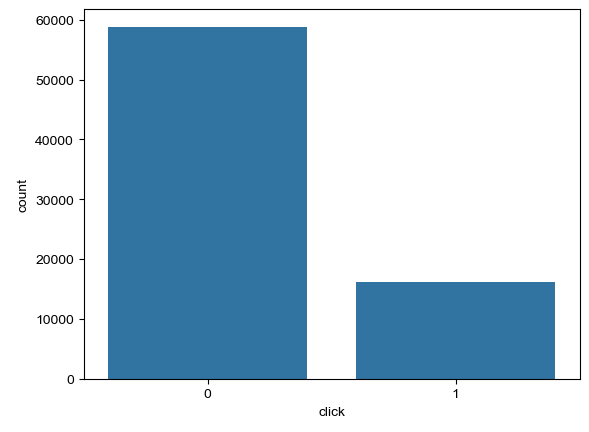

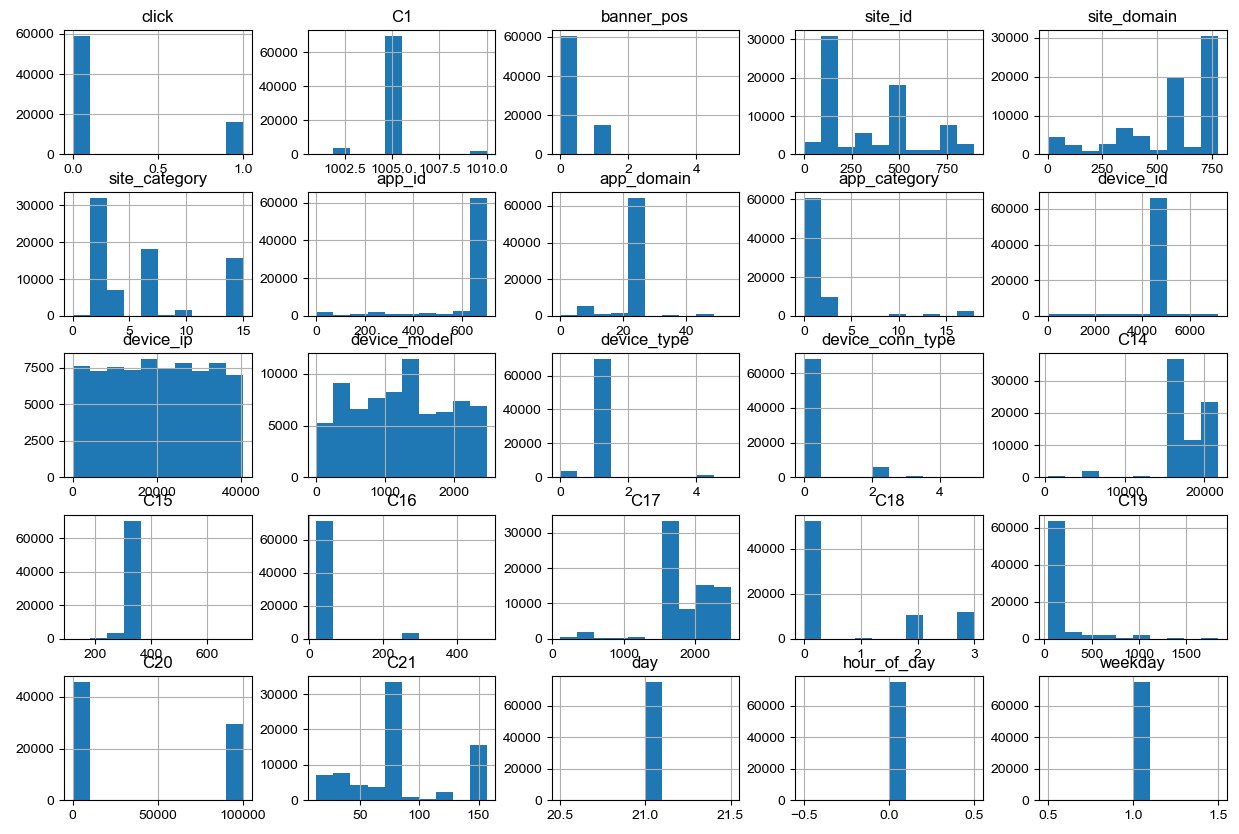

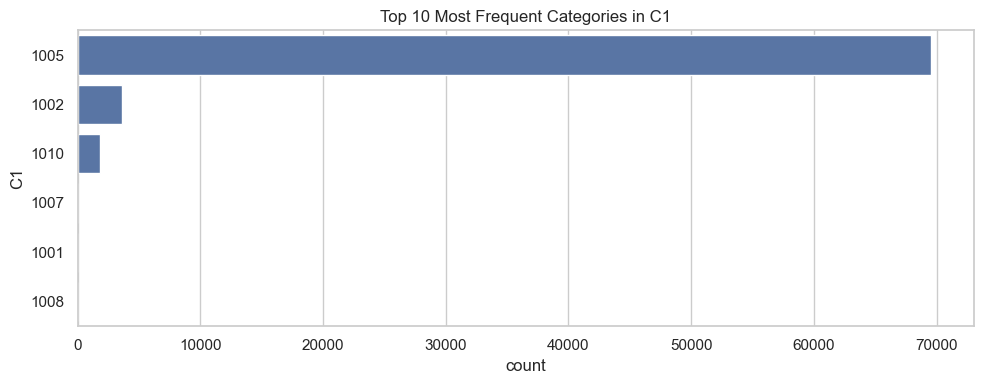


Top categories for banner_pos:

banner_pos
0    60252
1    14778
2       15
5       10
4        3
Name: count, dtype: int64


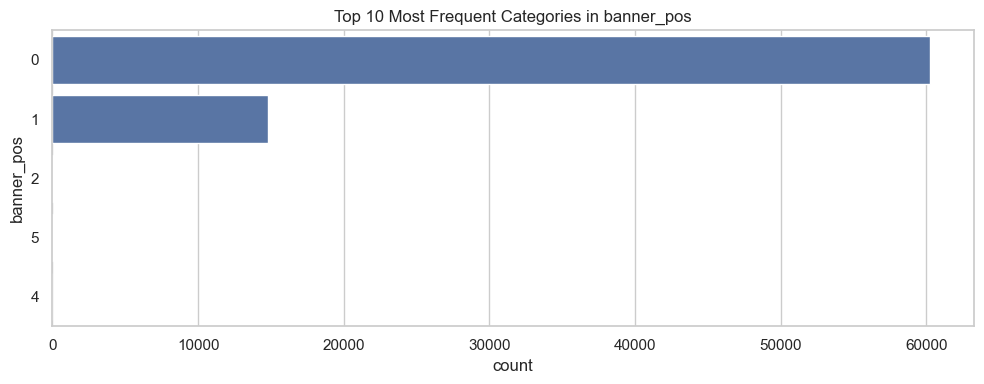


Top categories for site_id:

site_id
104    29825
475    14808
749     3466
775     2113
335     1765
13      1606
317     1223
247     1161
841      985
471      927
Name: count, dtype: int64


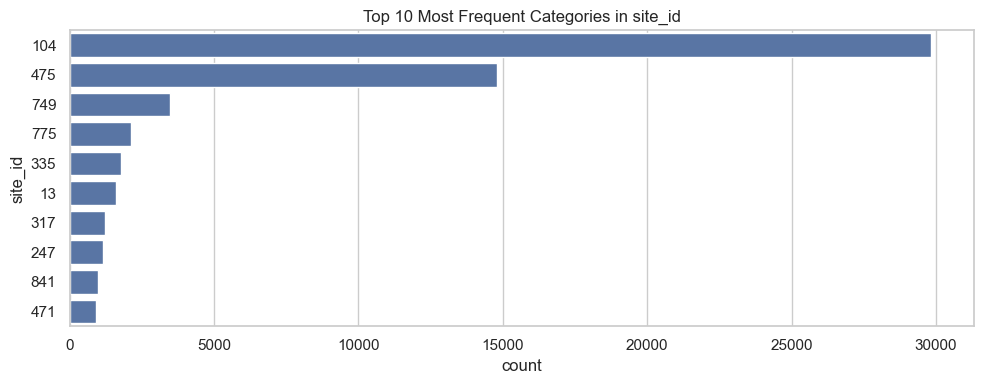


Top categories for site_domain:

site_domain
742    29825
595    16336
467     3529
357     2611
386     2243
17      1606
116     1424
605     1223
285      987
49       967
Name: count, dtype: int64


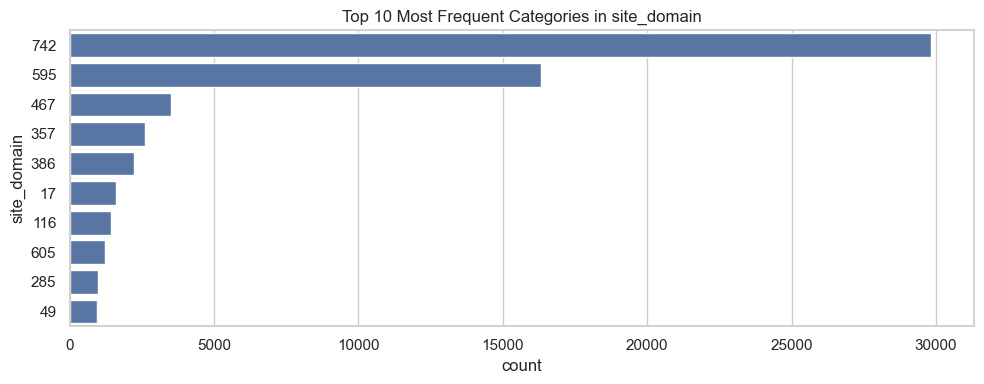


Top categories for site_category:

site_category
2     32114
6     17994
14    15475
4      5610
9      1677
3      1300
0       345
7       197
15      145
8       126
Name: count, dtype: int64


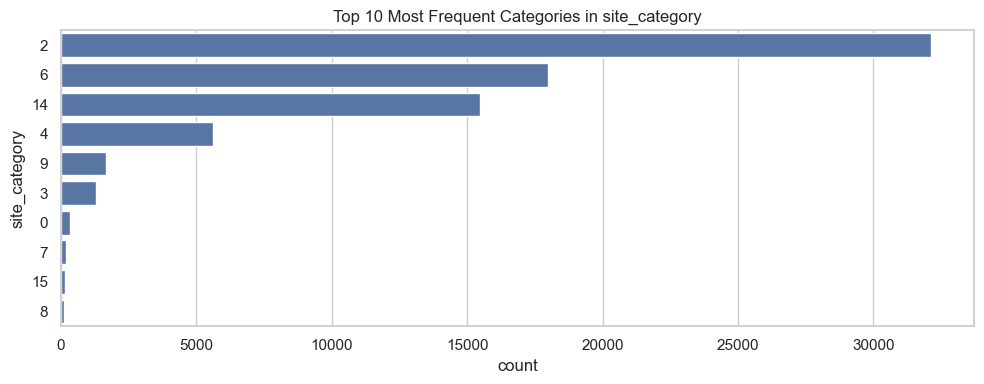


Top categories for app_id:

app_id
656    60250
626     1666
702     1306
32      1042
269      696
434      483
59       387
149      343
243      307
391      306
Name: count, dtype: int64


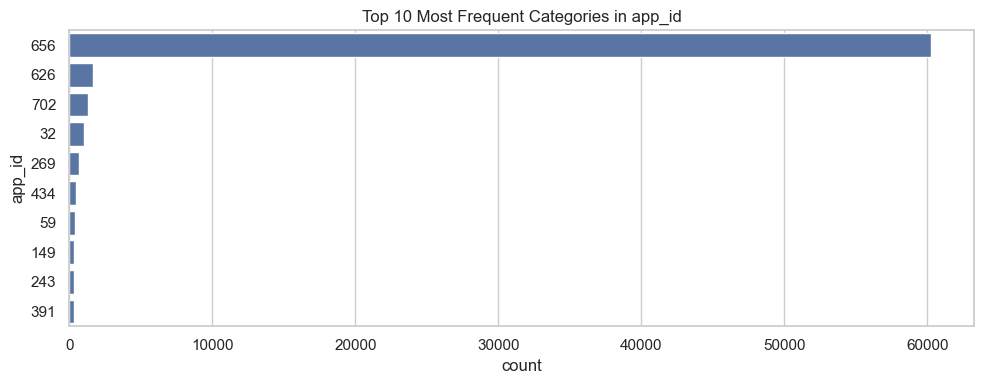


Top categories for app_domain:

app_domain
23    63161
6      5256
19     1666
26     1306
13     1042
45     1028
35      314
0       223
34      198
28      158
Name: count, dtype: int64


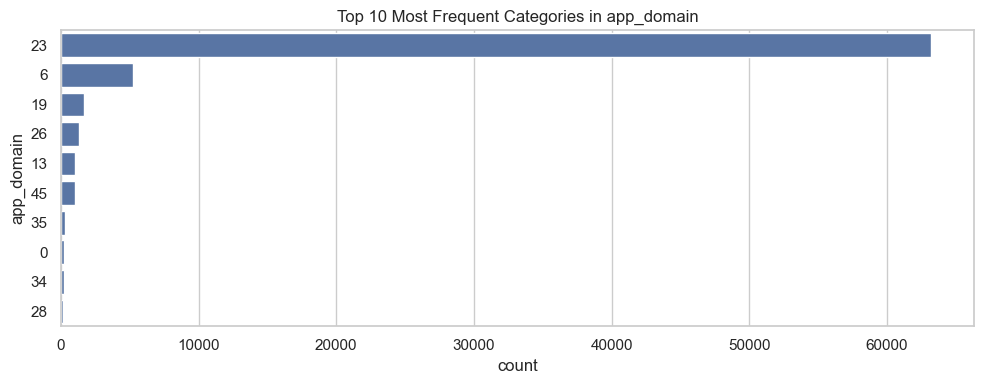


Top categories for app_category:

app_category
0     60670
2      9774
17     2238
14      999
9       945
15      119
7        90
5        58
1        39
16       38
Name: count, dtype: int64


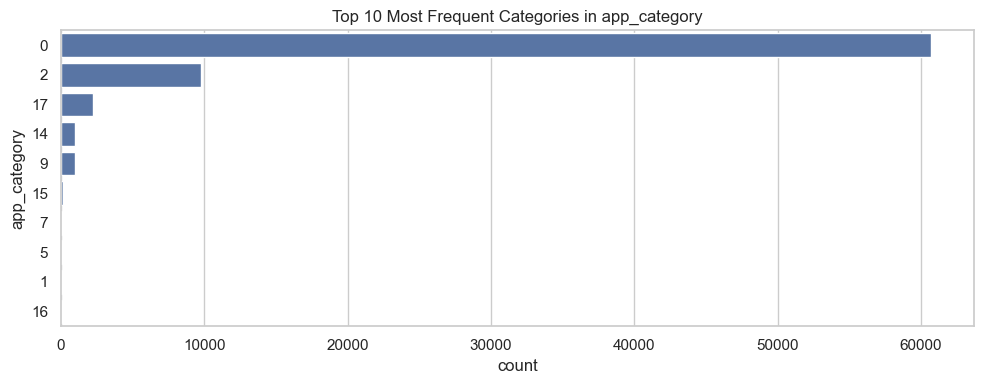


Top categories for device_id:

device_id
4865    65394
5576      167
4248       37
1956       15
2691       15
798        13
5572       12
5030       12
5577       12
6133       12
Name: count, dtype: int64


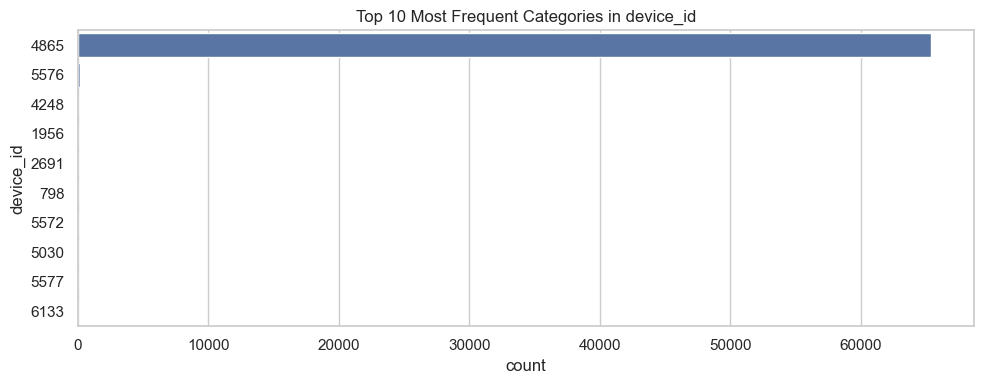


Top categories for device_model:

device_model
1322    5108
298     3014
2086    2690
756     1941
1084    1743
1901    1466
595     1342
1554    1320
2274    1259
541     1240
Name: count, dtype: int64


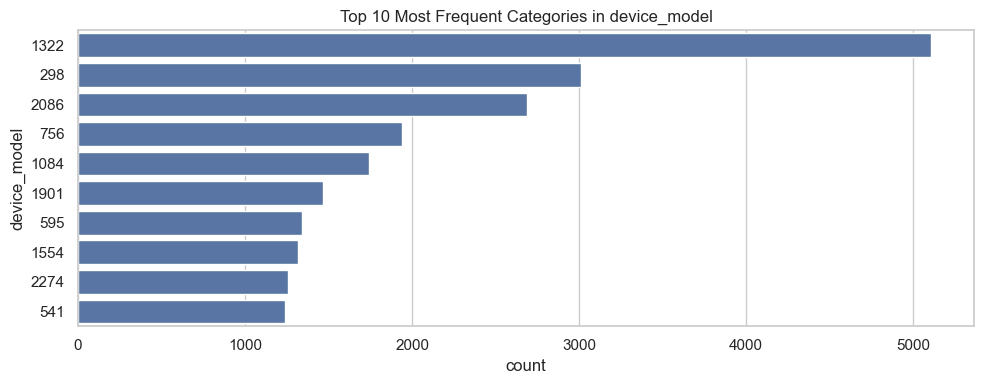


Top categories for device_type:

device_type
1    69663
0     3593
4     1653
5      149
Name: count, dtype: int64


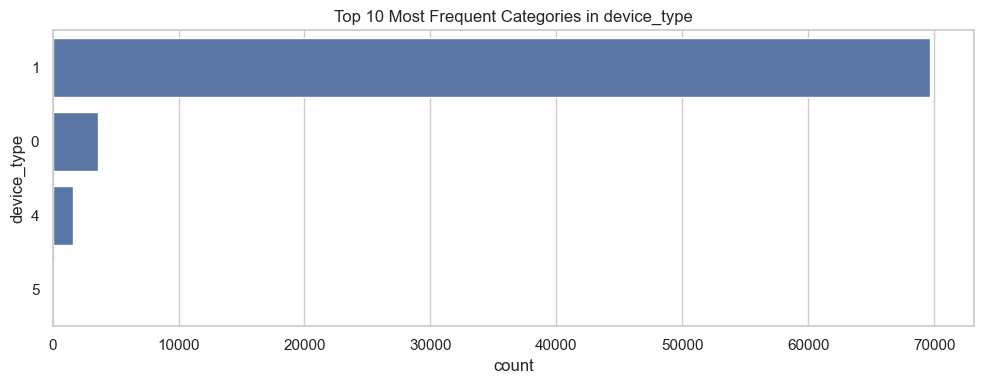


Top categories for device_conn_type:

device_conn_type
0    68083
2     6046
3      892
5       37
Name: count, dtype: int64


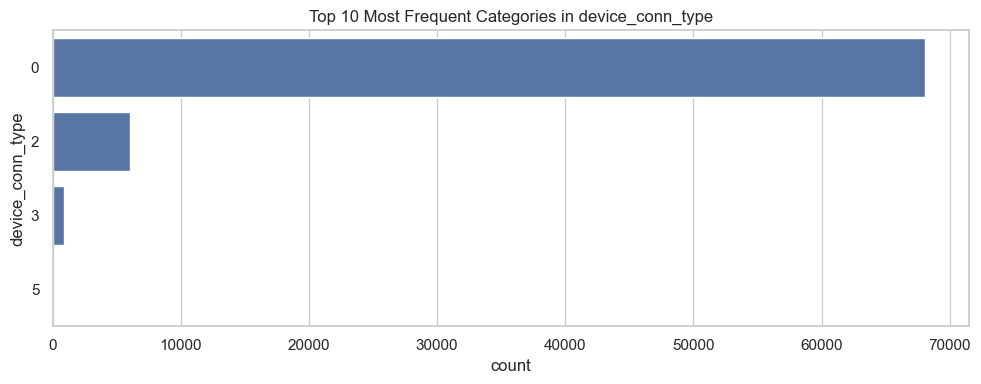


Top categories for C14:

C14
18993    5319
20596    5255
15701    3915
15708    3893
15703    3797
15699    3757
15707    3709
15705    3580
15704    3493
15706    3475
Name: count, dtype: int64


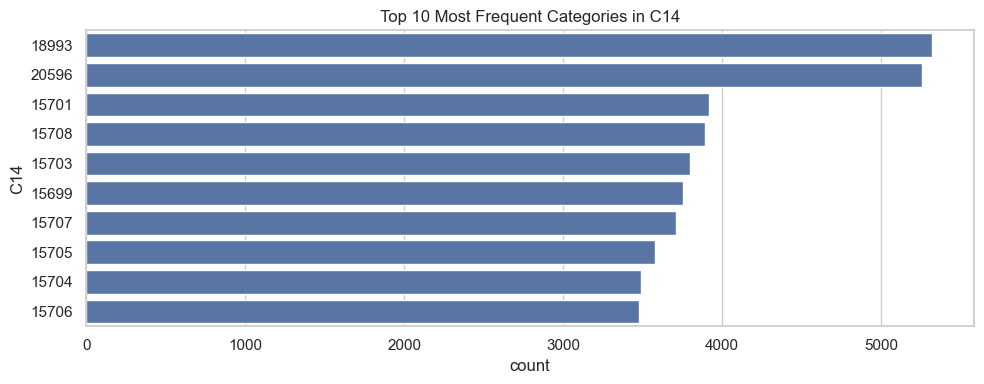


Top categories for C15:

C15
320    70620
300     3713
216      709
728       14
120        2
Name: count, dtype: int64


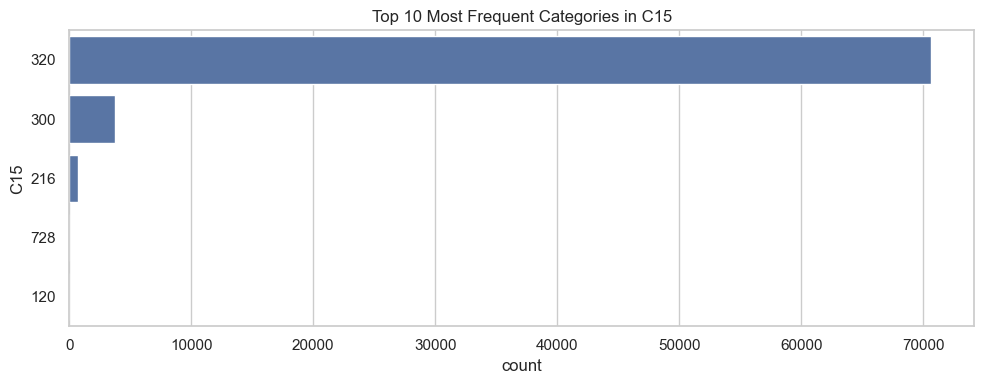


Top categories for C16:

C16
50     71031
250     3282
36       709
480       20
90        14
20         2
Name: count, dtype: int64


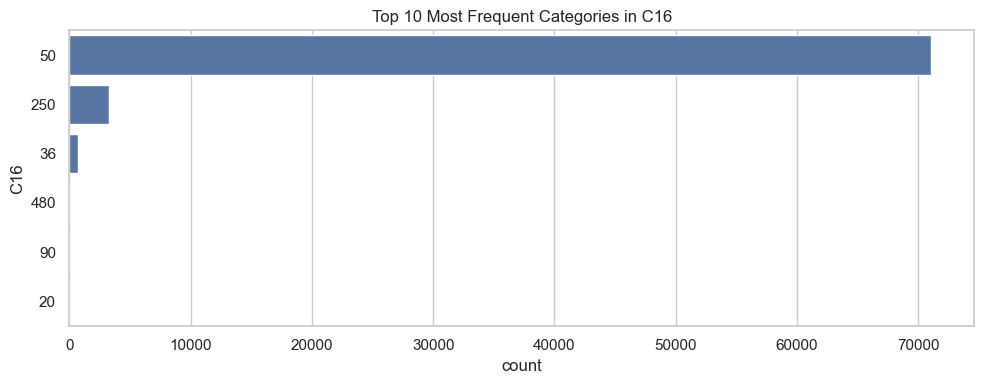


Top categories for C17:

C17
1722    33007
2161    10574
2333     3920
2480     2221
1993     2183
1994     1802
2227     1562
2374     1506
2493     1372
2253     1125
Name: count, dtype: int64


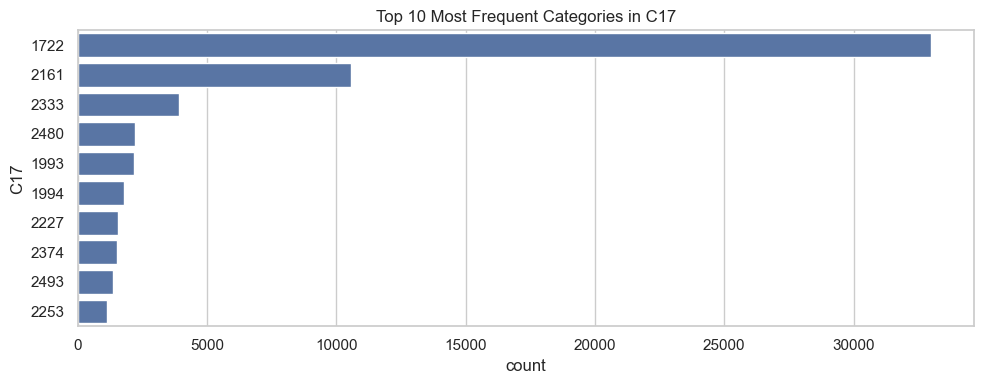


Top categories for C18:

C18
0    52430
3    11894
2    10589
1      145
Name: count, dtype: int64


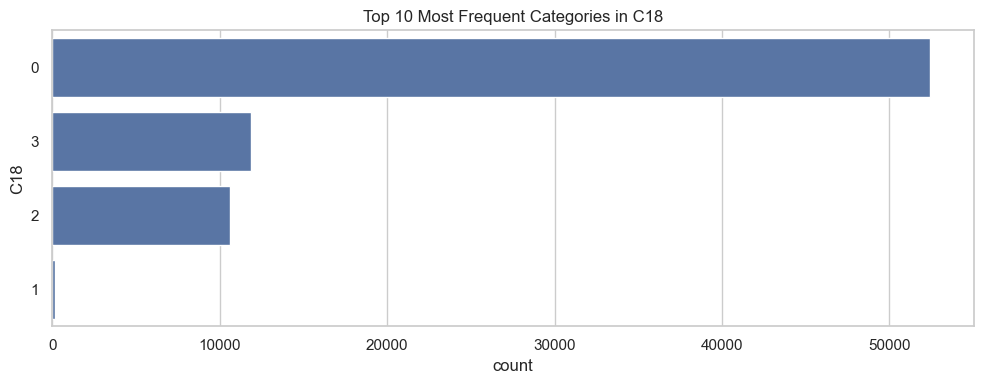


Top categories for C19:

C19
35      45775
39      13217
297      2448
1063     2183
687      1952
167      1698
163      1354
303      1317
171       852
431       842
Name: count, dtype: int64


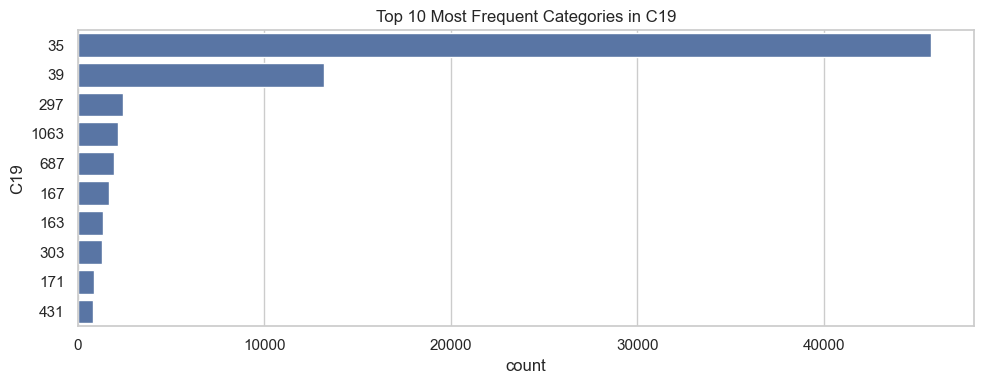


Top categories for C20:

C20
-1         45703
 100084    10183
 100083     3319
 100111     2413
 100077     1128
 100075      991
 100081      971
 100148      911
 100228      806
 100034      738
Name: count, dtype: int64


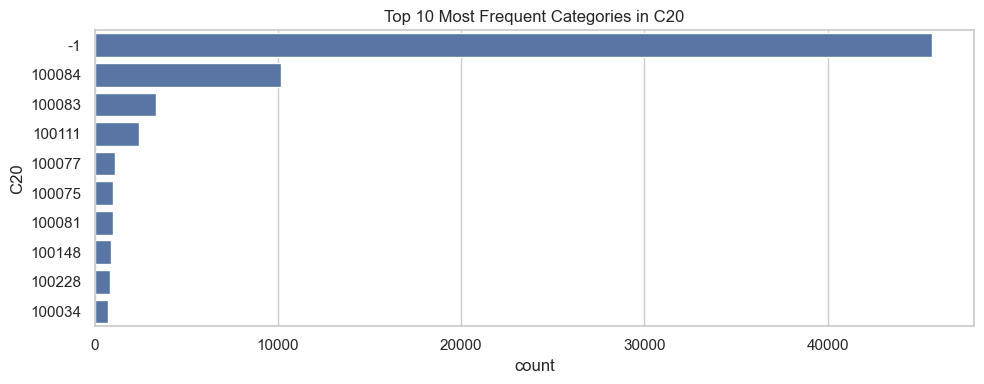


Top categories for C21:

C21
79     33007
157    14494
23      5555
33      4744
61      3707
32      2829
117     2184
48      2123
52      1125
156     1031
Name: count, dtype: int64


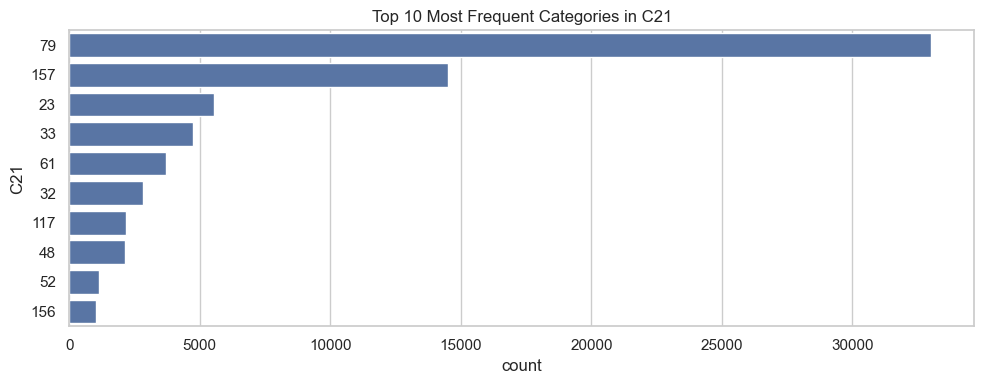


Top categories for day:

day
21    75058
Name: count, dtype: int64


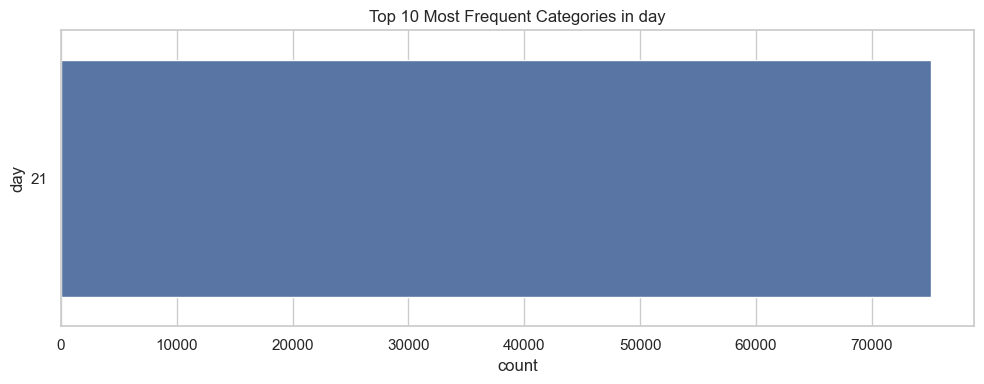


Top categories for hour_of_day:

hour_of_day
0    75058
Name: count, dtype: int64


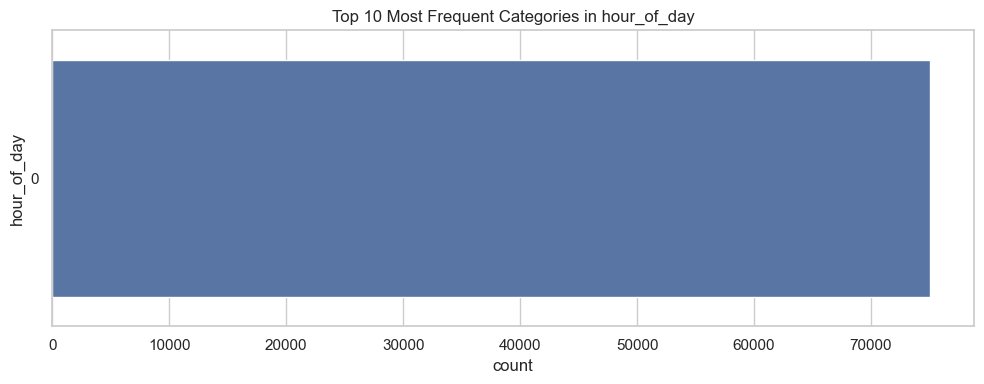


Top categories for weekday:

weekday
1    75058
Name: count, dtype: int64


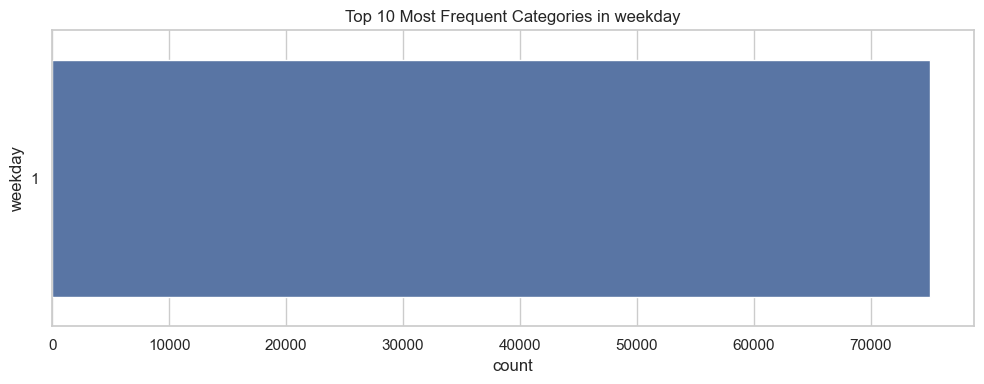

In [31]:
%matplotlib inline
# Optional: set style
sns.set(style="whitegrid")

# Find categorical columns
categorical_cols = ctr_df.select_dtypes(include=['object', 'category']).columns

# Plot top 10 categories for each categorical column
for col in categorical_cols:
    print(f"\nTop categories for {col}:\n")
    print(ctr_df[col].value_counts().head(10))
    
    plt.figure(figsize=(10, 4))
    sns.countplot(y=col, data=ctr_df, order=ctr_df[col].value_counts().iloc[:10].index)
    plt.title(f'Top 10 Most Frequent Categories in {col}')
    plt.tight_layout()
    plt.show()


The bar representing '0' (no click) is much taller than the bar representing '1' (click).

This indicates that there are far more instances in your dataset where 
a click did not occur compared to the instances where a click did occur.

Popular Sites: Sites with a high frequency might have a larger influence on the overall CTR.

Rare Sites: Sites with very low frequencies might be less statistically significant or 
could be candidates for grouping into a less frequent category.
Feature Importance: During model training, the model might learn different CTR patterns associated 
with different site IDs. The most frequent sites might have a stronger impact on the model's predictions.

This chart reveals the distribution of the most common app categories in the data. 

Based on the visual:

The app category represented by '0' is overwhelmingly the most frequent, with a count of approximately 60,000.
The app category '2' is the second most frequent, with a count of around 9,774.
The frequency of the remaining top 8 app categories decreases significantly.
Implications for CTR Prediction:

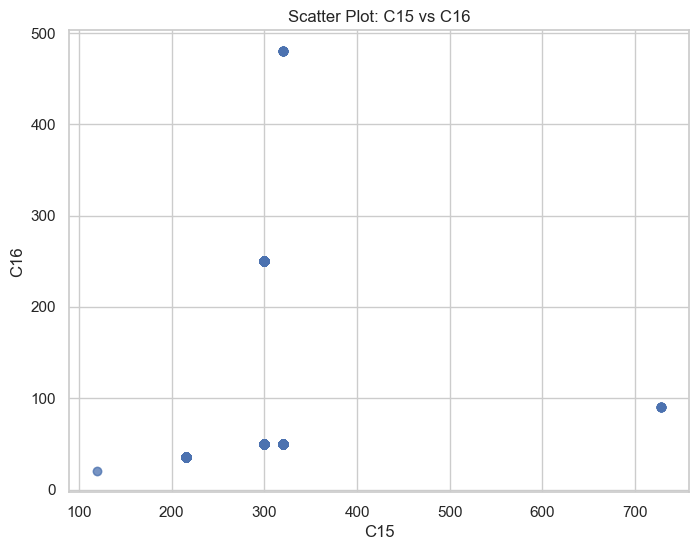

In [55]:

# Example: df = pd.read_csv('path_to_your_cleaned_data.csv')
ctr_df = pd.read_csv('C:/Users/vidus/Projects/CTRPredictionCapstone/data/clean_data/cleaned_ctr_prediction_data.csv')

# Scatter plot for C15 vs. C16
plt.figure(figsize=(8,6))
plt.scatter(ctr_df['C15'], ctr_df['C16'], alpha=0.5)
plt.title('Scatter Plot: C15 vs C16')
plt.xlabel('C15')
plt.ylabel('C16')
plt.grid(True)
plt.show()


- There is some visible clustering in lower value ranges.

- Most data points are concentrated in a narrow band.

- No strong linear relationship observed.

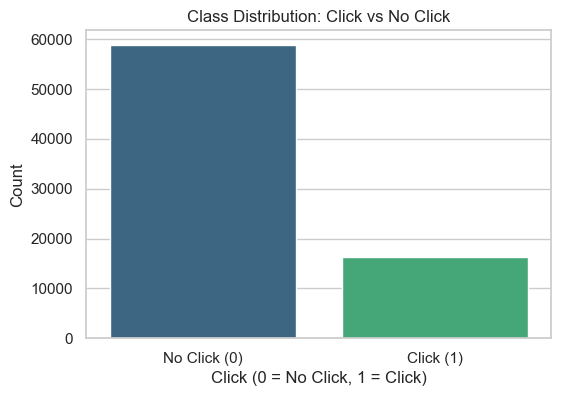

In [57]:
# Check class distribution
class_counts = ctr_df['click'].value_counts()

# Create bar plot

plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette='viridis', legend=False)
plt.title('Class Distribution: Click vs No Click')
plt.xlabel('Click (0 = No Click, 1 = Click)')
plt.ylabel('Count')
plt.xticks([0,1], ['No Click (0)', 'Click (1)'])
plt.show()


In [59]:
# Step - 6 Feature Correlation
corr = ctr_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')


<Axes: >

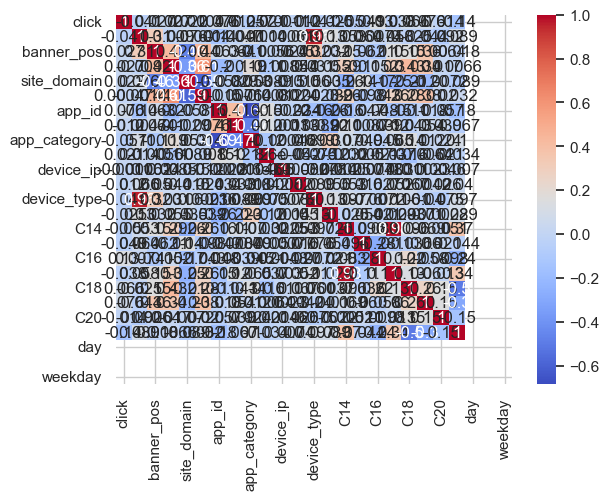

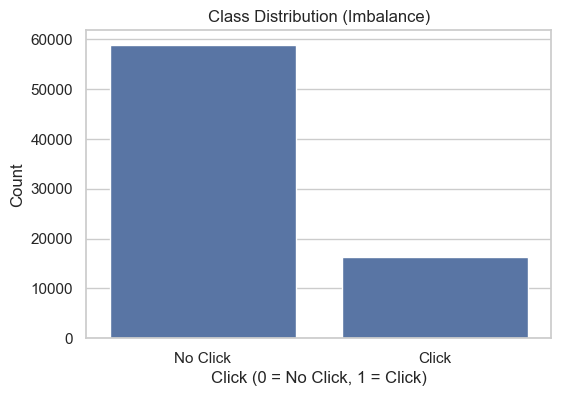

In [61]:
#Class Imbalance (Target Variable)
# Class imbalance bar plot
class_counts = ctr_df['click'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution (Imbalance)')
plt.xlabel('Click (0 = No Click, 1 = Click)')
plt.ylabel('Count')
plt.xticks([0,1], ['No Click', 'Click'])
plt.show()

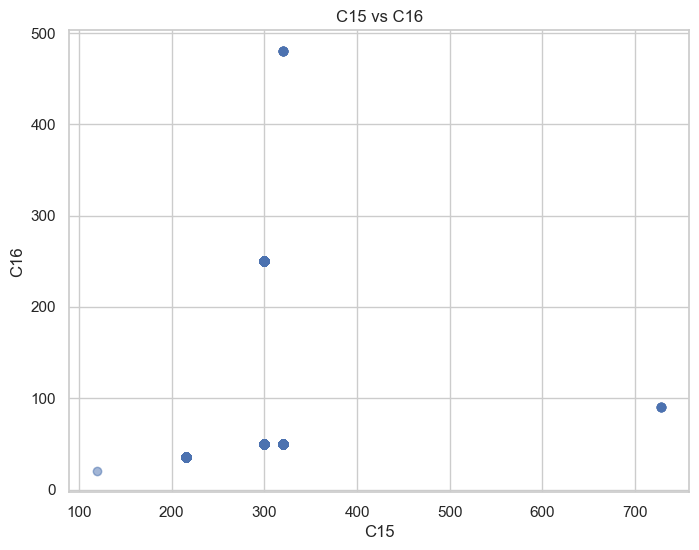

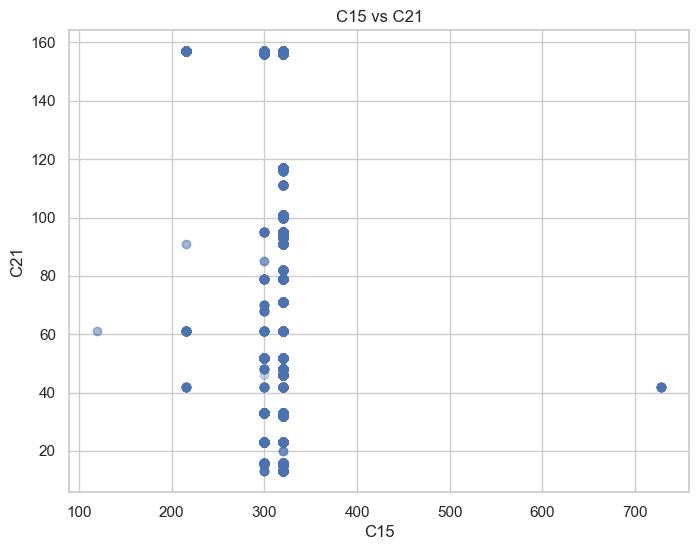

In [63]:
# Scatter Plots for Key Features
# Scatter Plot 1: C15 vs C16
plt.figure(figsize=(8,6))
plt.scatter(ctr_df['C15'], ctr_df['C16'], alpha=0.3)
plt.title('C15 vs C16')
plt.xlabel('C15')
plt.ylabel('C16')
plt.grid(True)
plt.show()

# Scatter Plot 2: C15 vs C21
plt.figure(figsize=(8,6))
plt.scatter(ctr_df['C15'], ctr_df['C21'], alpha=0.3)
plt.title('C15 vs C21')
plt.xlabel('C15')
plt.ylabel('C21')
plt.grid(True)
plt.show()

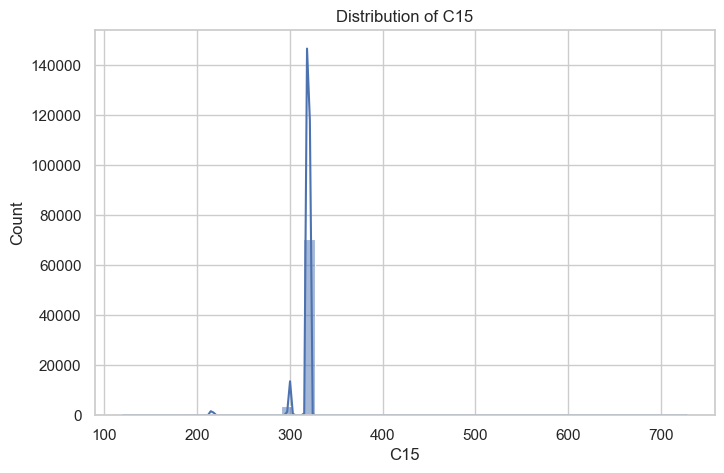

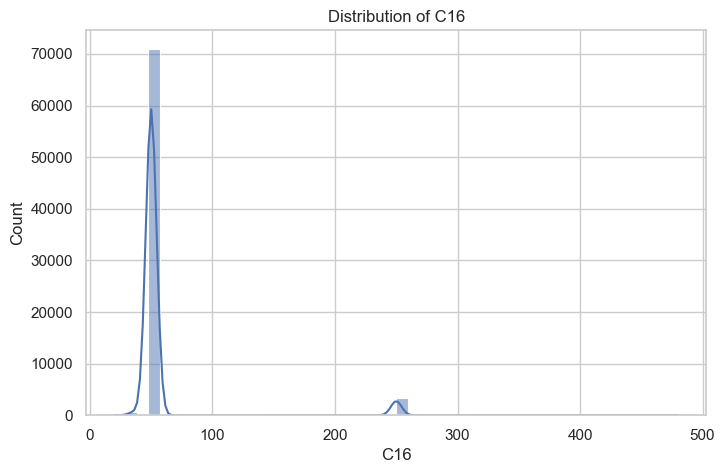

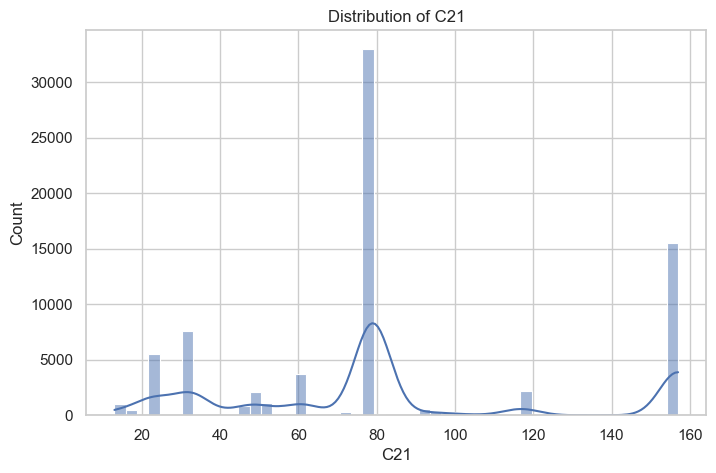

In [65]:
# Distribution Plots (Feature Distribution)
# Distribution of C15
plt.figure(figsize=(8,5))
sns.histplot(ctr_df['C15'], bins=50, kde=True)
plt.title('Distribution of C15')
plt.xlabel('C15')
plt.show()

# Distribution of C16
plt.figure(figsize=(8,5))
sns.histplot(ctr_df['C16'], bins=50, kde=True)
plt.title('Distribution of C16')
plt.xlabel('C16')
plt.show()

# Distribution of C21
plt.figure(figsize=(8,5))
sns.histplot(ctr_df['C21'], bins=50, kde=True)
plt.title('Distribution of C21')
plt.xlabel('C21')
plt.show()


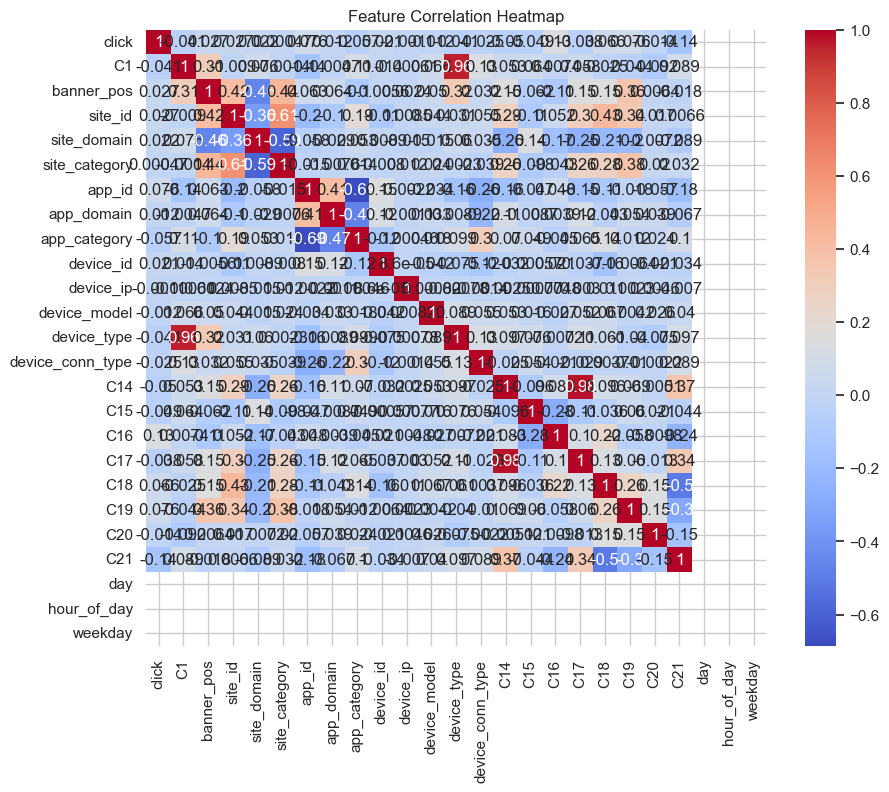

In [67]:
#Correlation Heatmap (to detect feature interactions)
# Correlation heatmap for numeric features
plt.figure(figsize=(10,8))
sns.heatmap(ctr_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


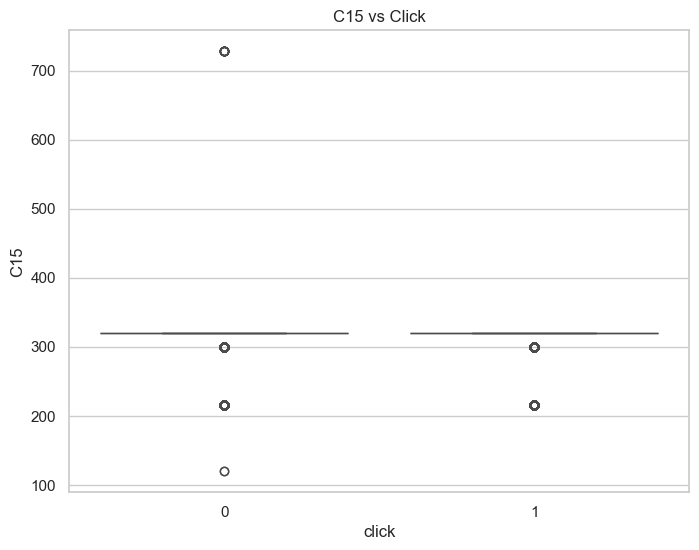

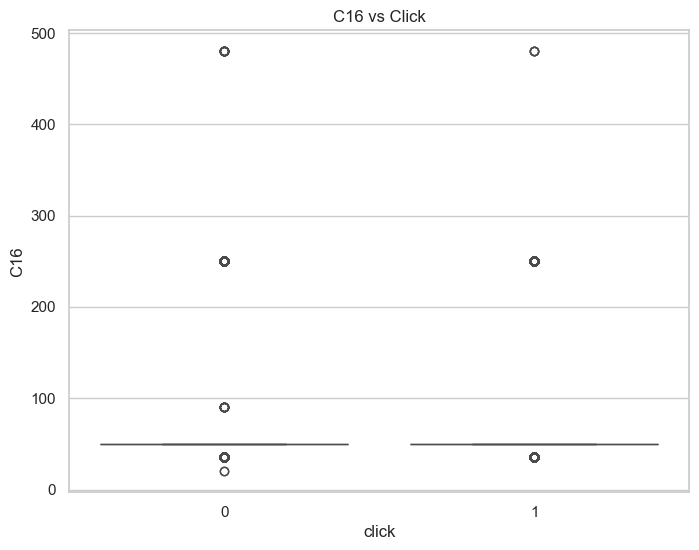

In [69]:
#Click vs Feature Boxplots (how features relate to click)
# Example: C15 vs Click
plt.figure(figsize=(8,6))
sns.boxplot(x='click', y='C15', data=ctr_df)
plt.title('C15 vs Click')
plt.show()

# Example: C16 vs Click
plt.figure(figsize=(8,6))
sns.boxplot(x='click', y='C16', data=ctr_df)
plt.title('C16 vs Click')
plt.show()


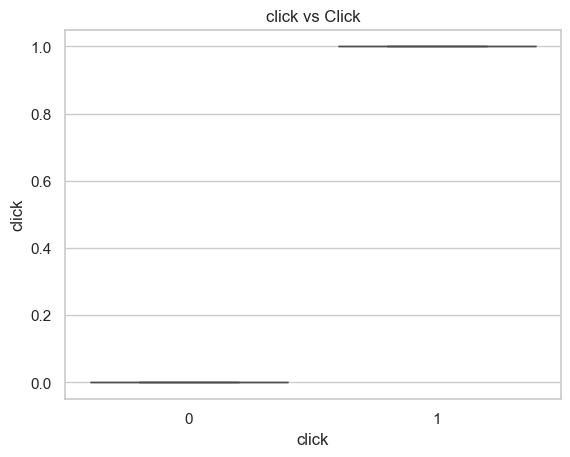

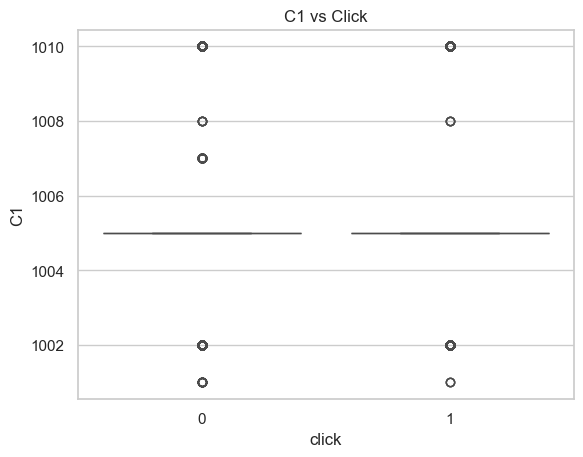

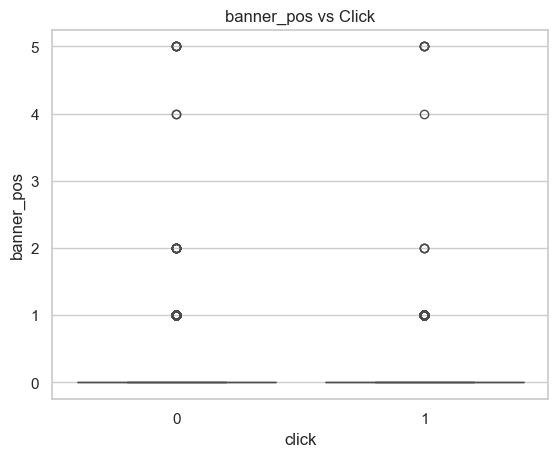

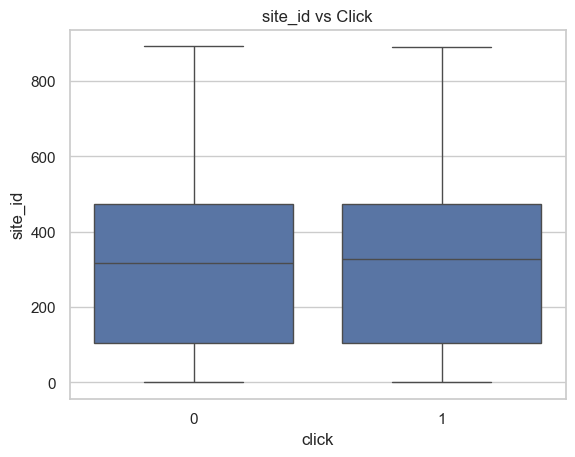

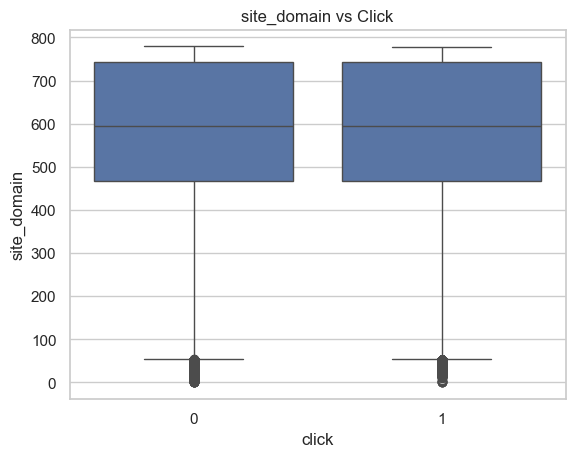

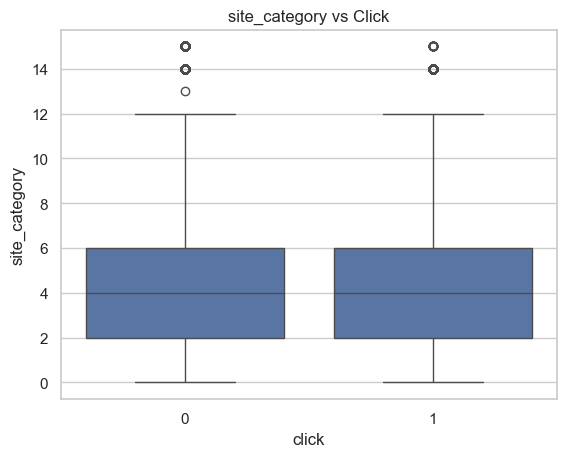

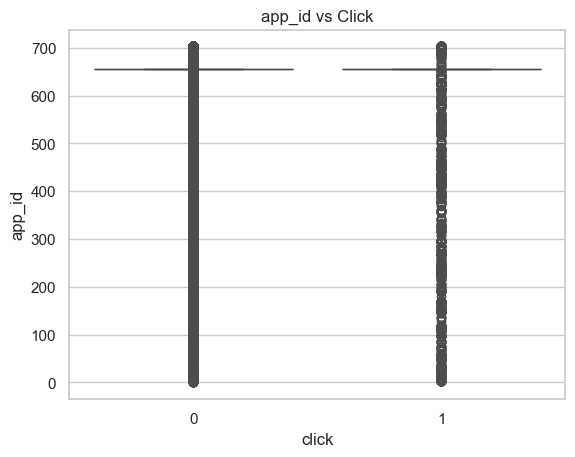

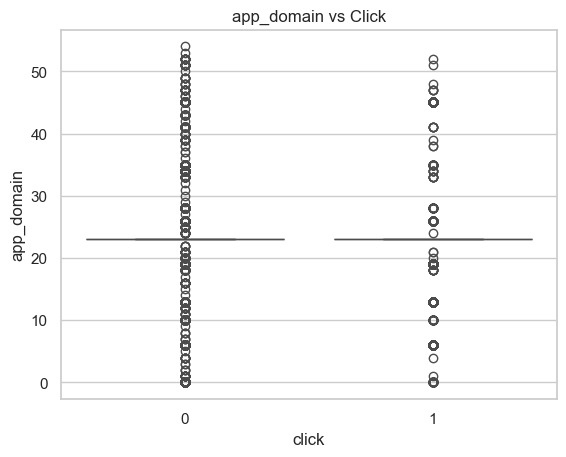

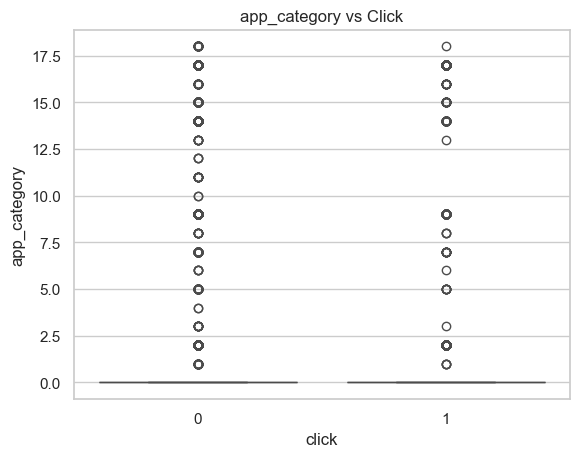

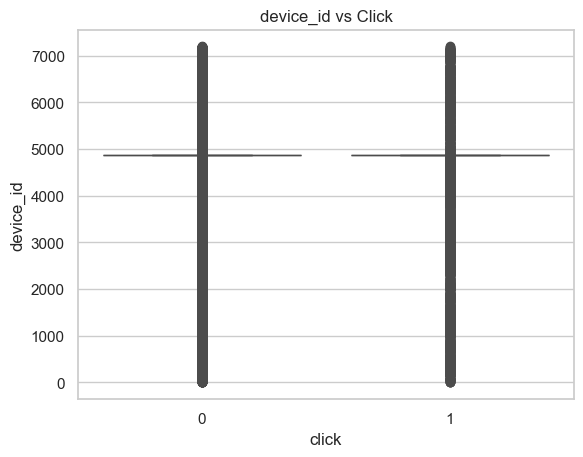

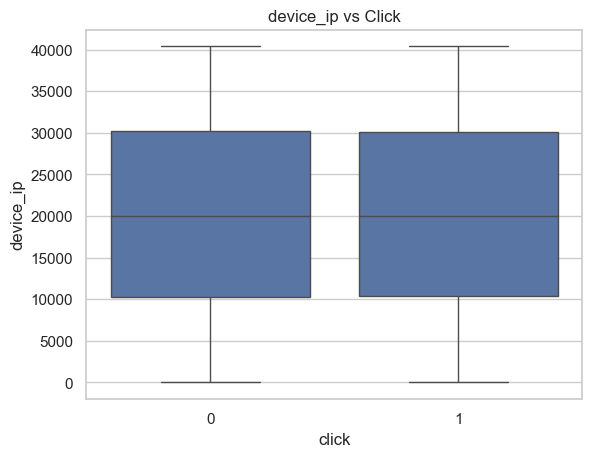

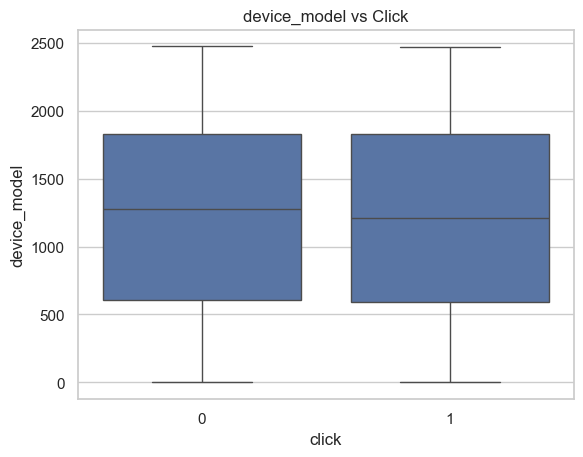

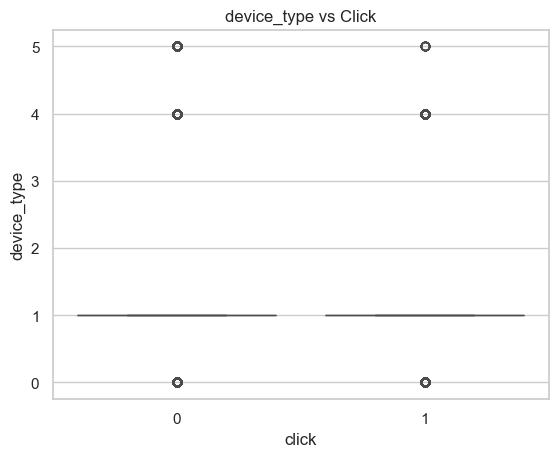

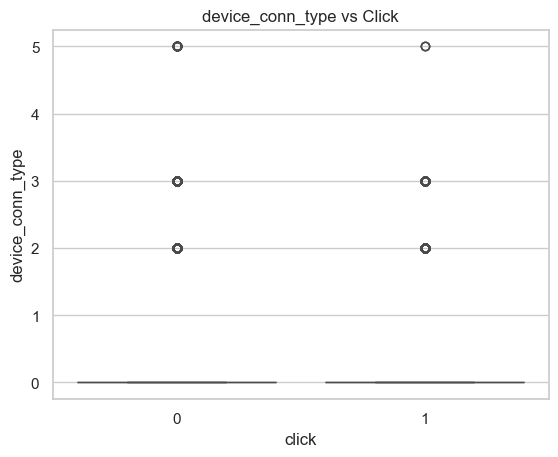

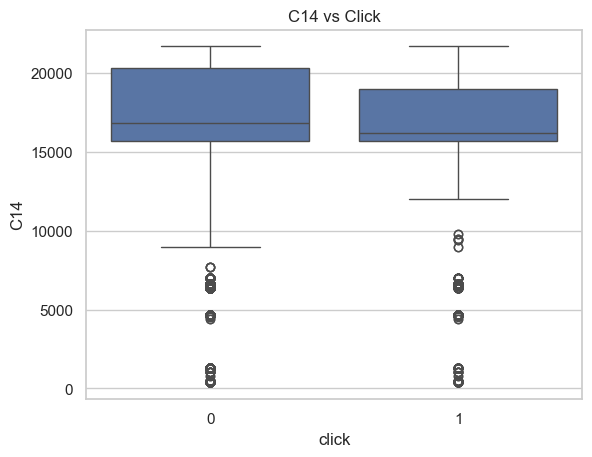

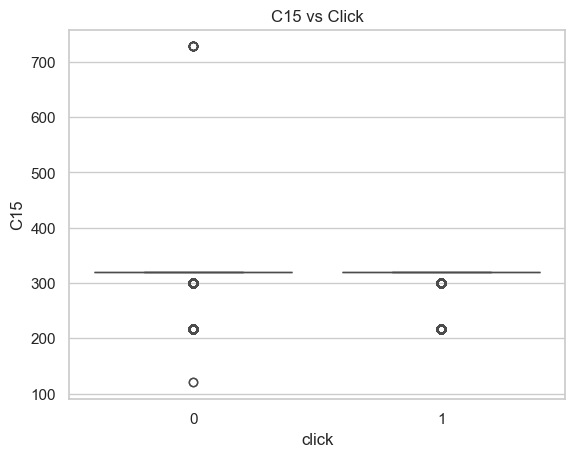

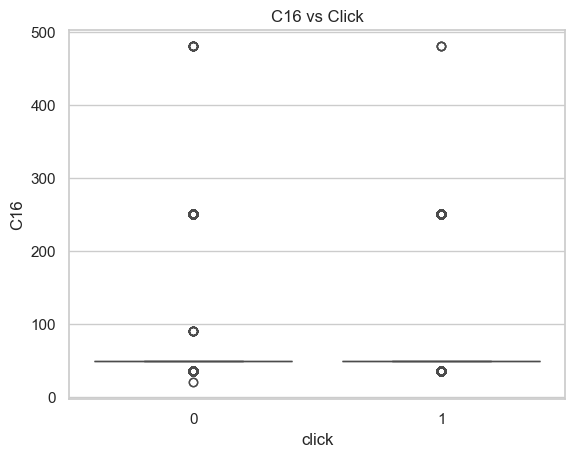

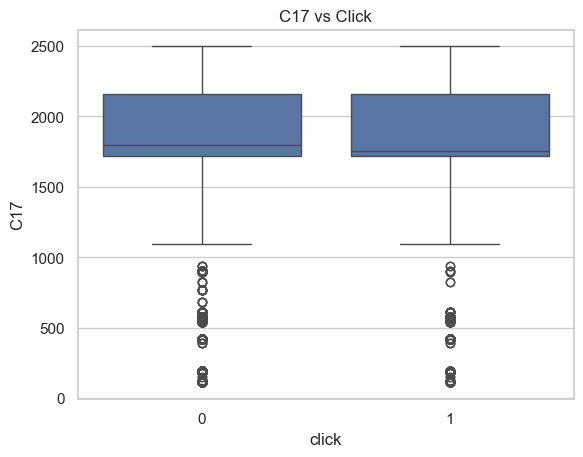

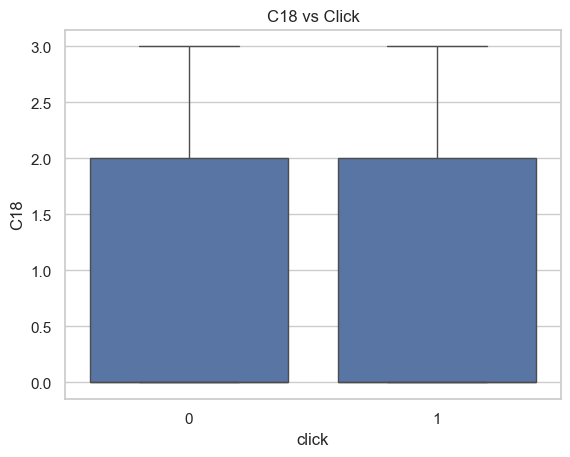

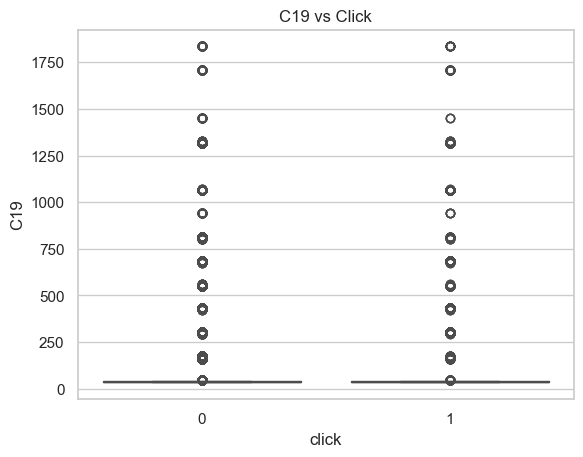

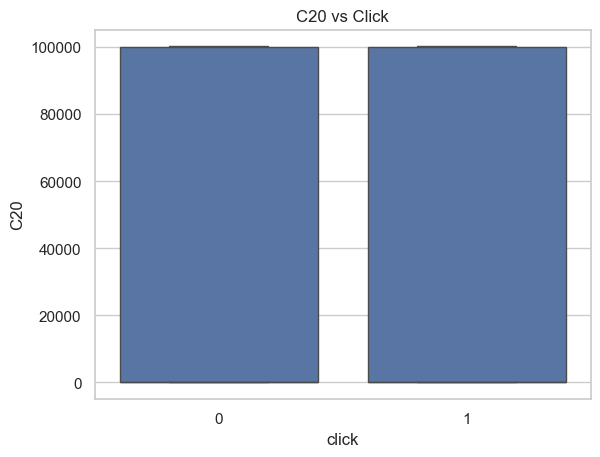

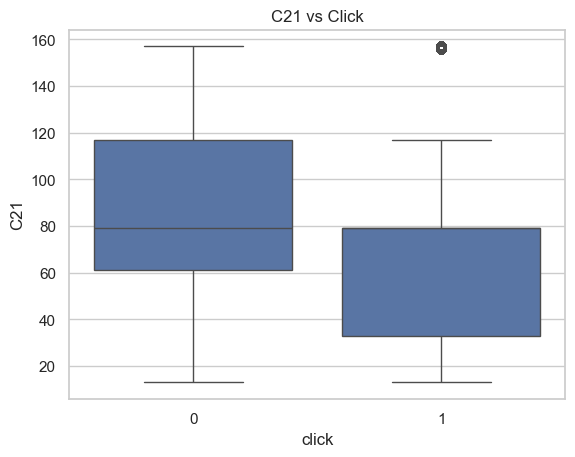

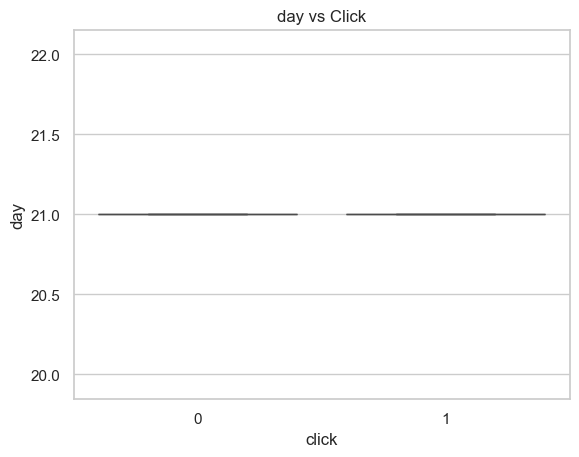

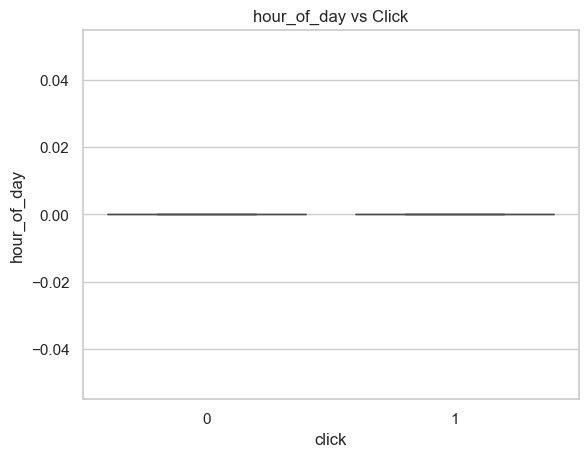

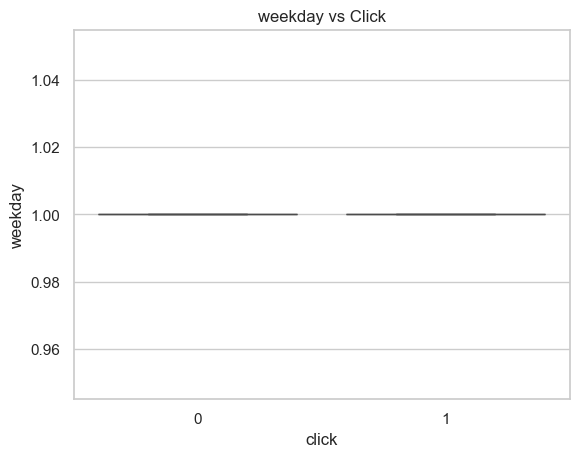

In [71]:
# Step - 7 - Feature vs Target (Click)
# Numerical
for col in numerical_cols:
    sns.boxplot(x='click', y=col, data=ctr_df)
    plt.title(f'{col} vs Click')
    plt.show()



# Categorical
for col in categorical_cols:
    sns.barplot(x=col, y='click', data=ctr_df, estimator=lambda x: sum(x==1)/len(x))
    plt.xticks(rotation=90)
    plt.title(f'CTR by {col}')
    plt.show()


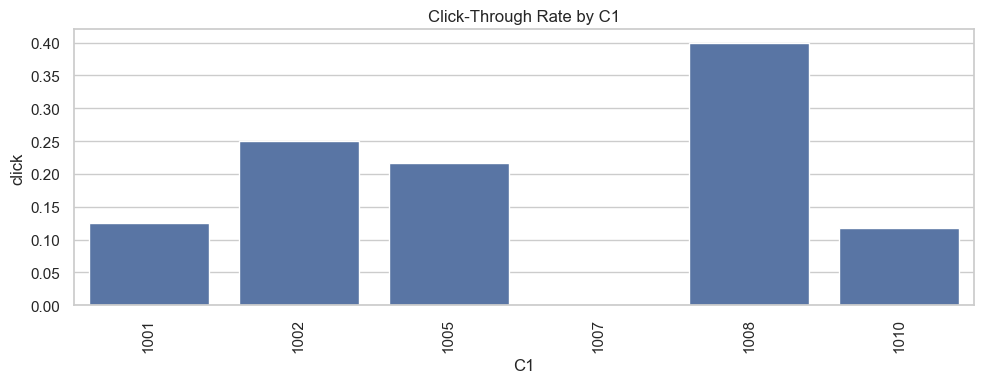

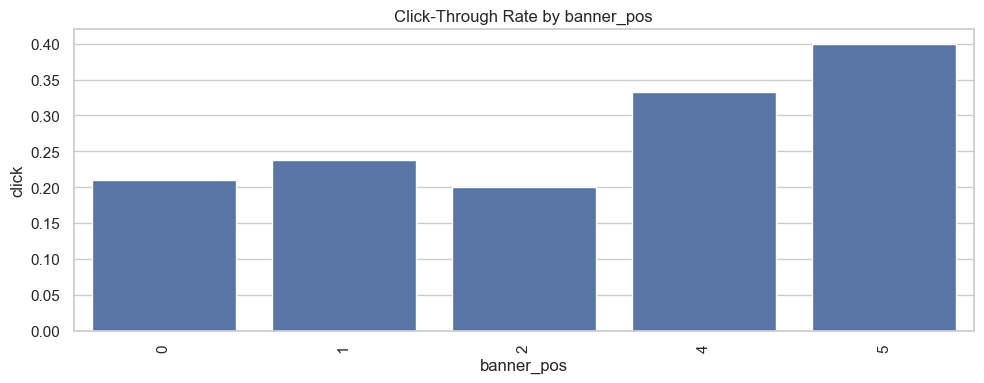

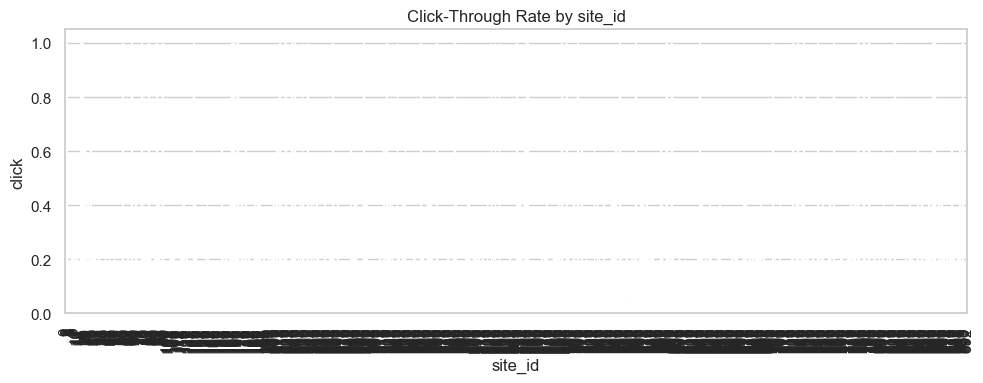

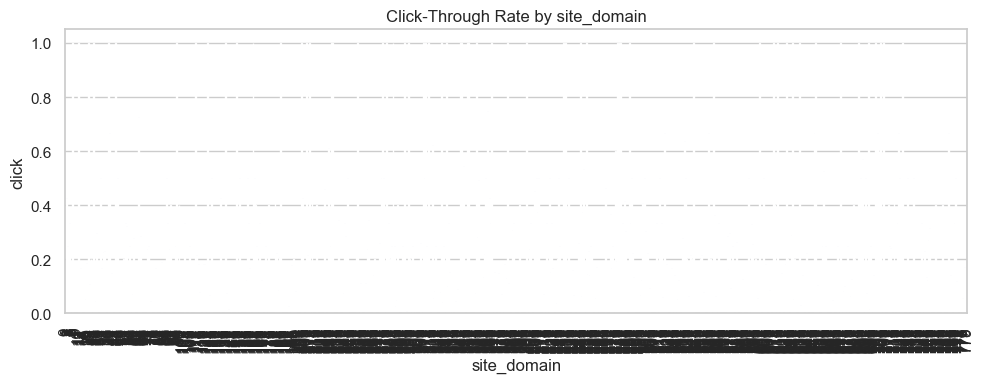

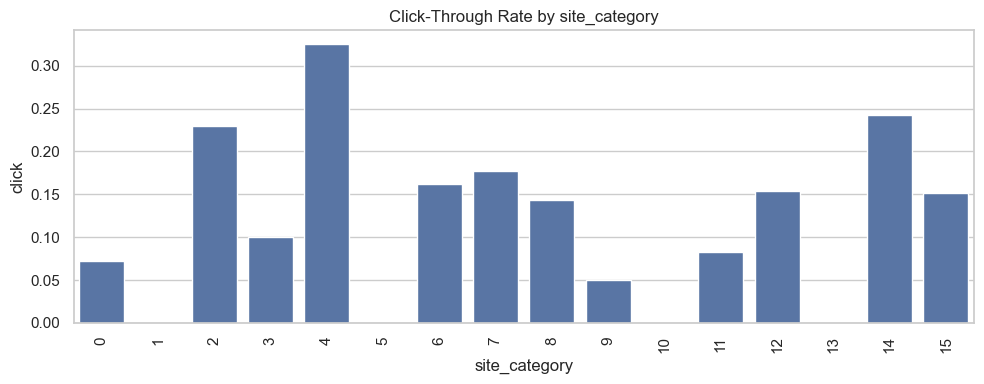

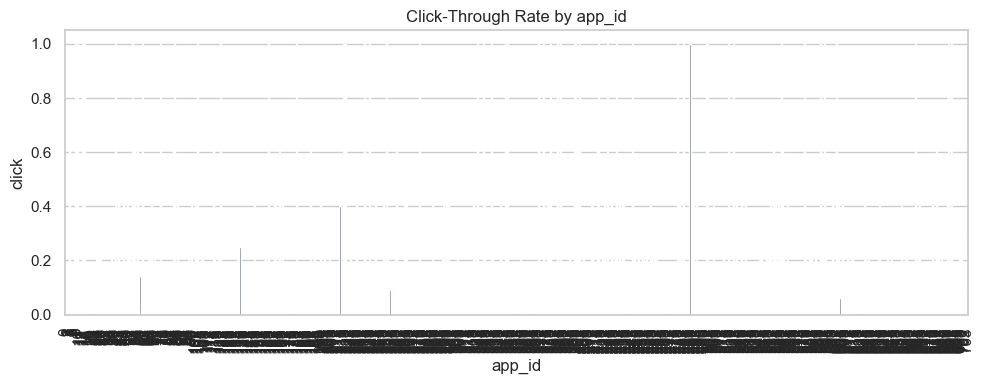

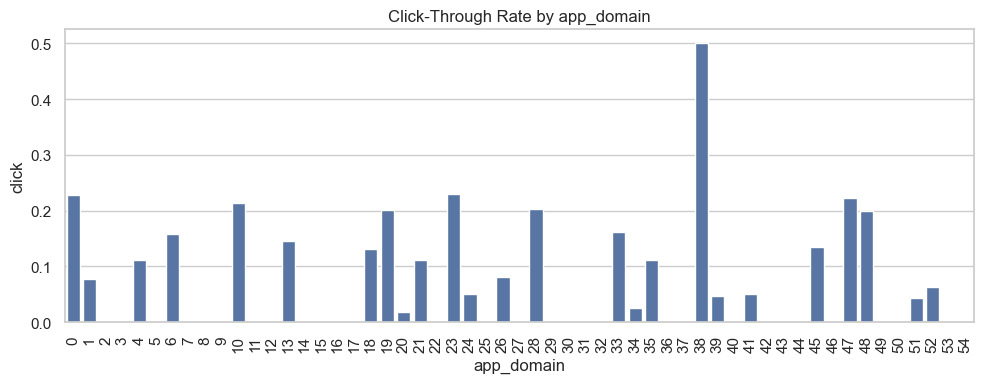

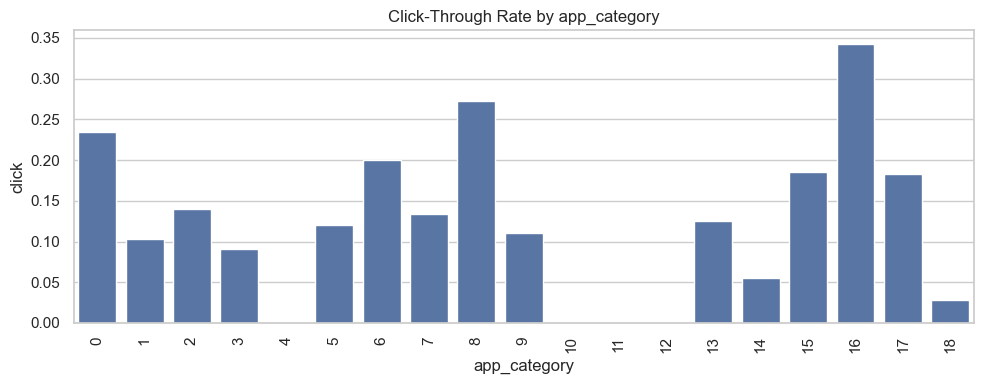

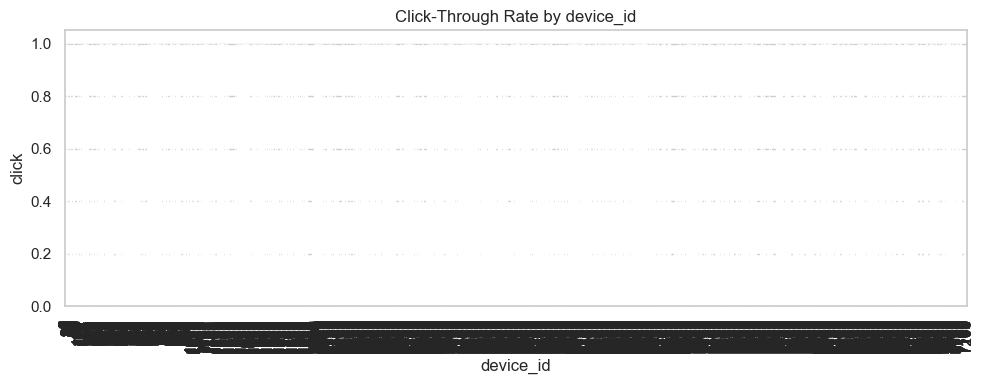

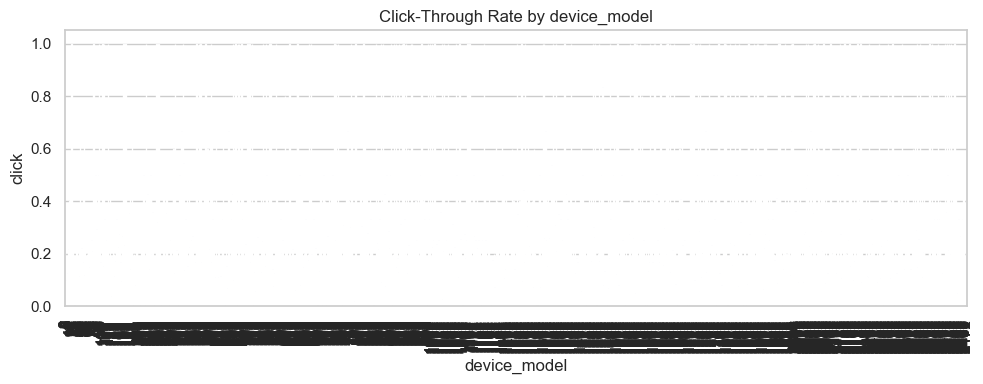

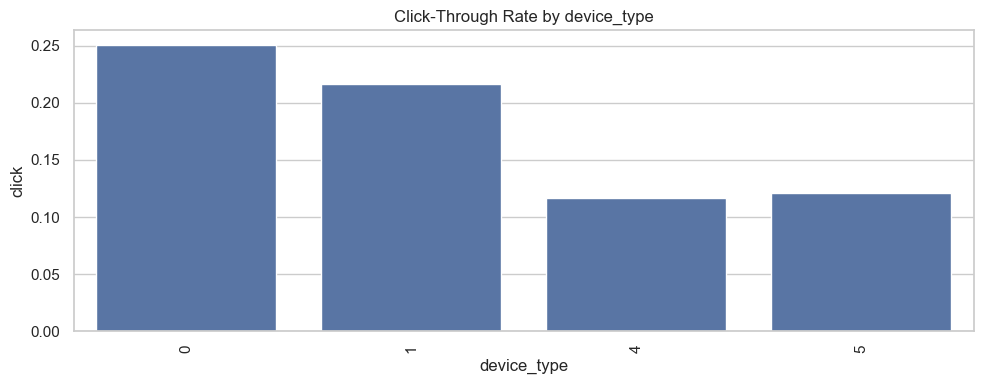

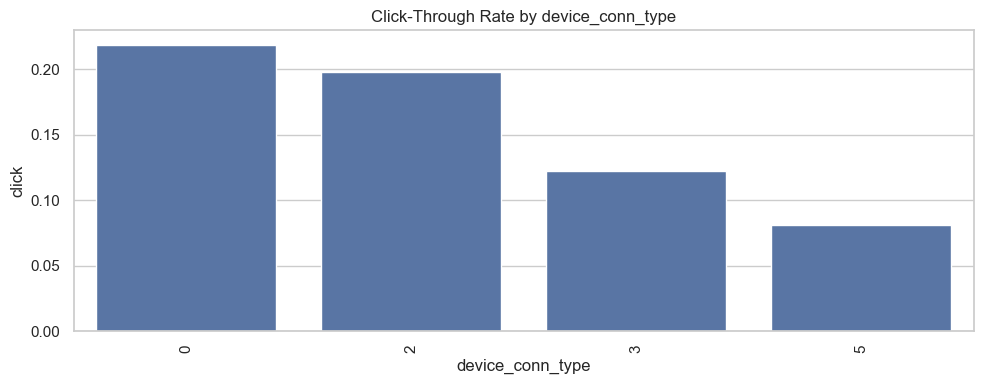

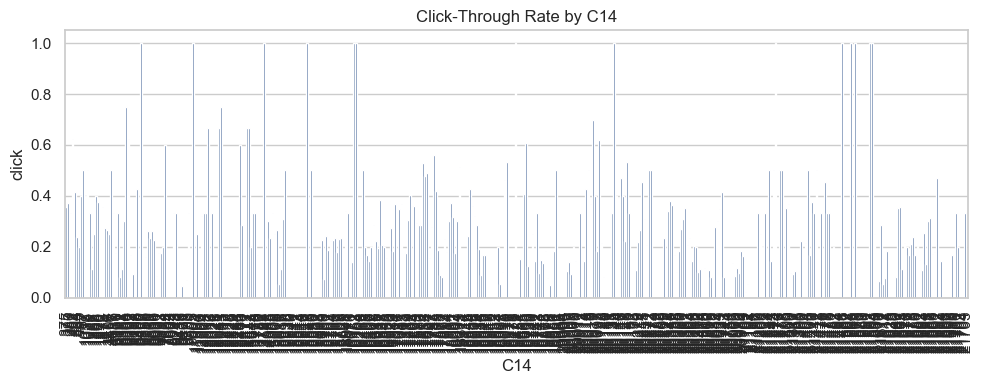

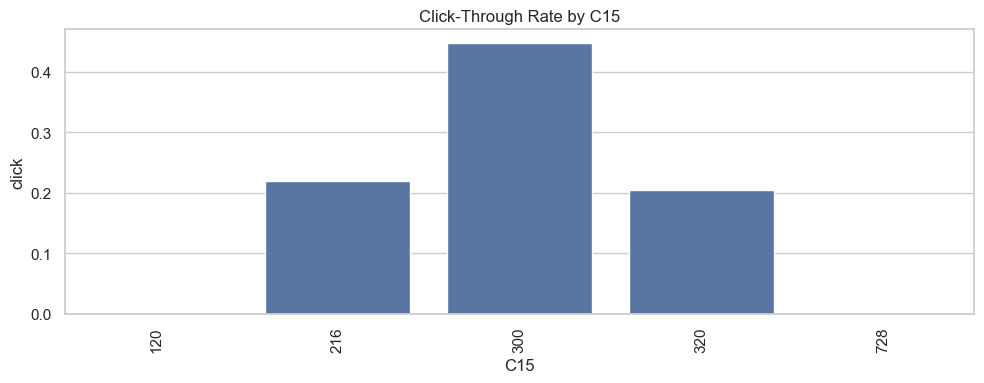

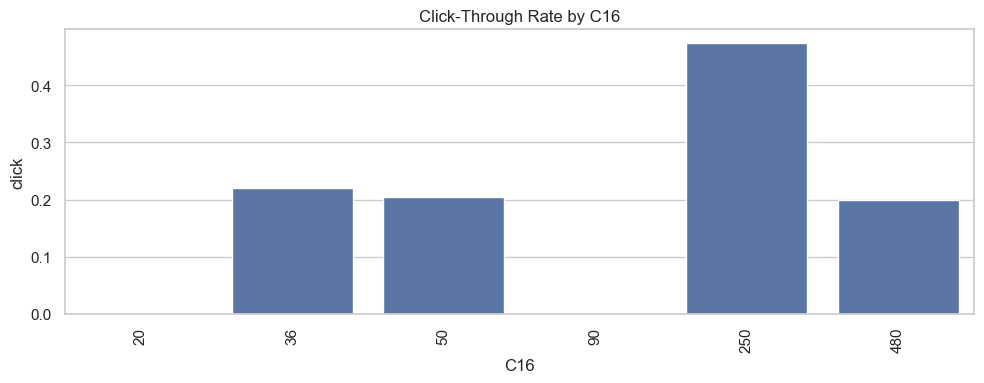

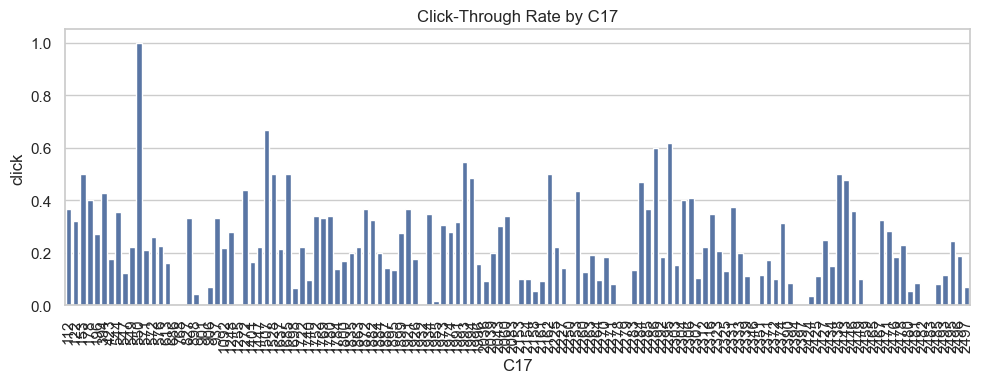

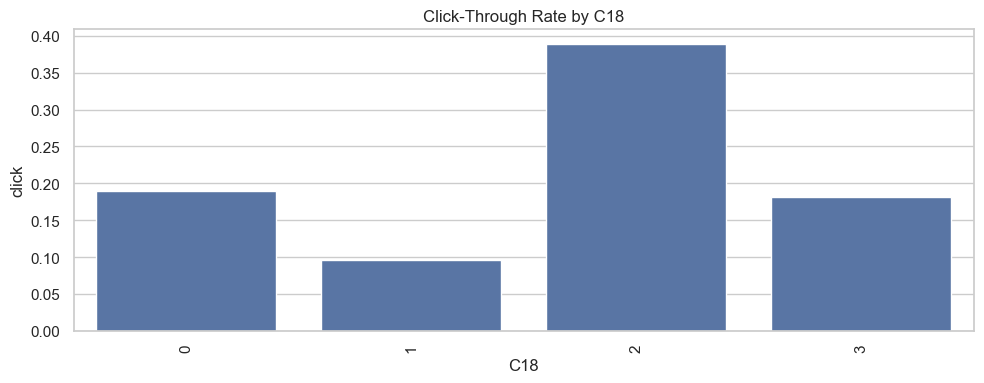

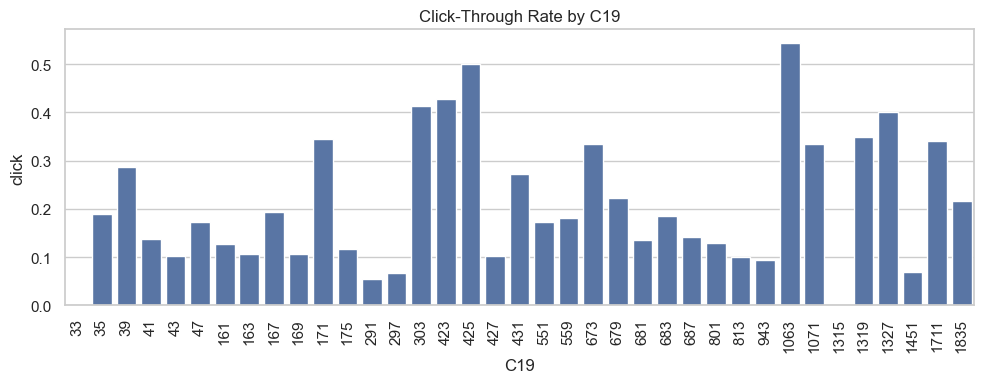

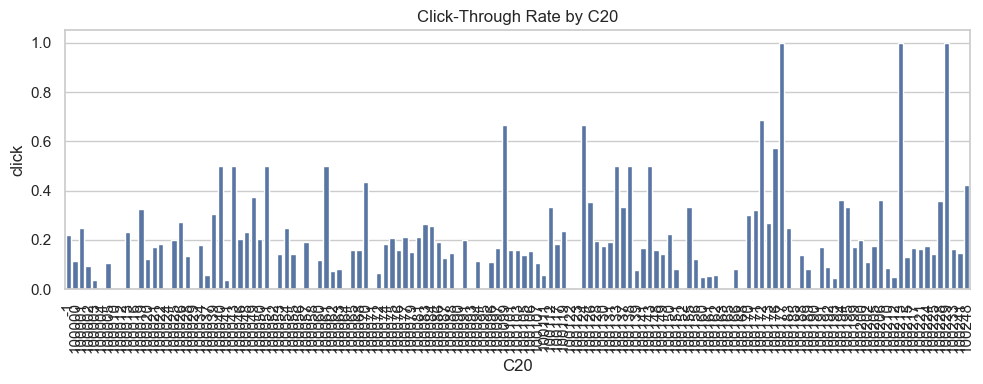

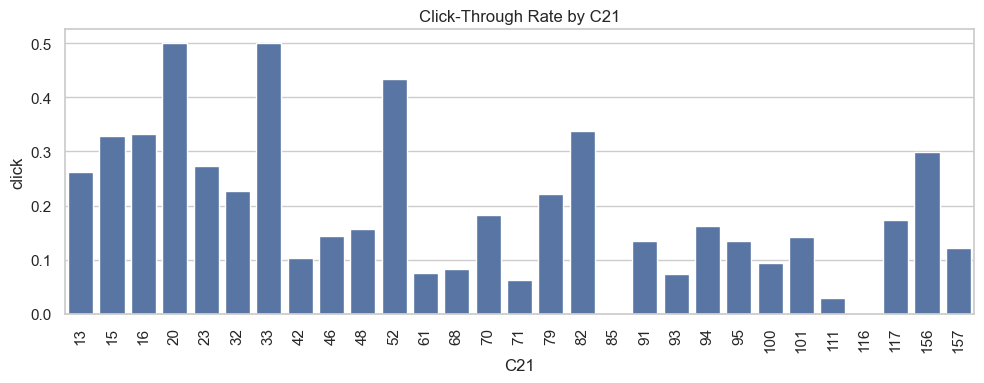

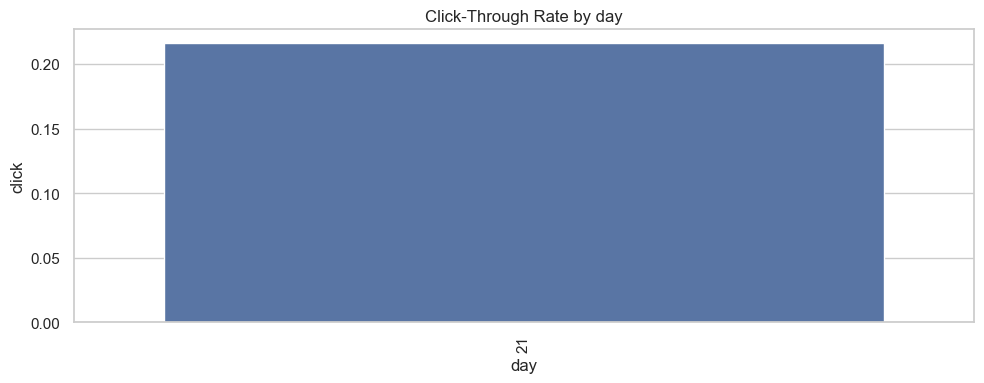

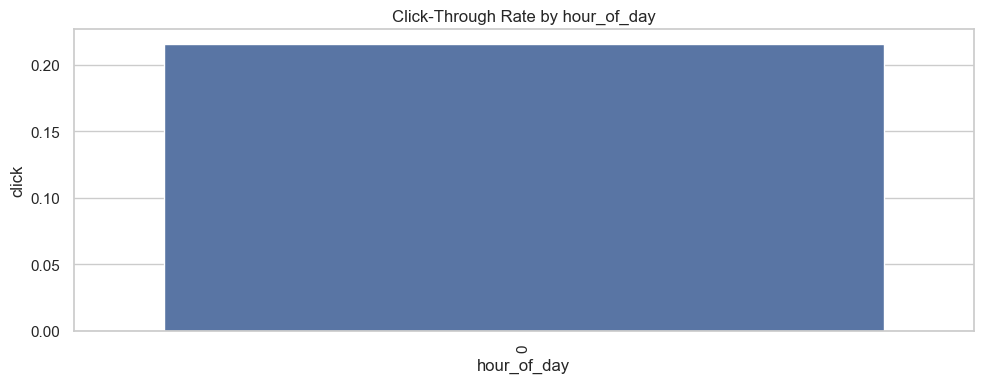

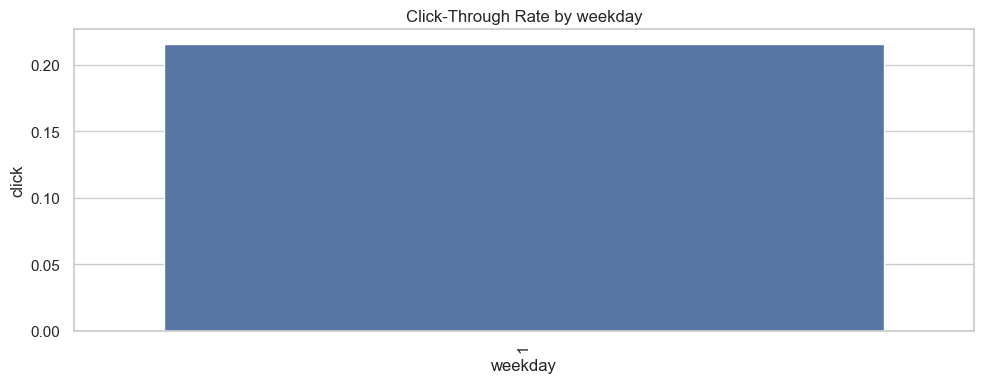

In [34]:
%matplotlib inline 

sns.set(style="whitegrid")

# Loop through categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 4))  # <-- Make room for x-labels
    sns.barplot(
        x=col,
        y='click',
        data=ctr_df,
        estimator=lambda x: sum(x == 1) / len(x),
        errorbar=None  # Avoid confidence interval clutter
    )
    plt.xticks(rotation=90)
    plt.title(f'Click-Through Rate by {col}')
    plt.tight_layout()
    plt.show()


In [42]:
print(ctr_df.columns)

Index(['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21', 'day', 'hour_of_day', 'weekday'],
      dtype='object')


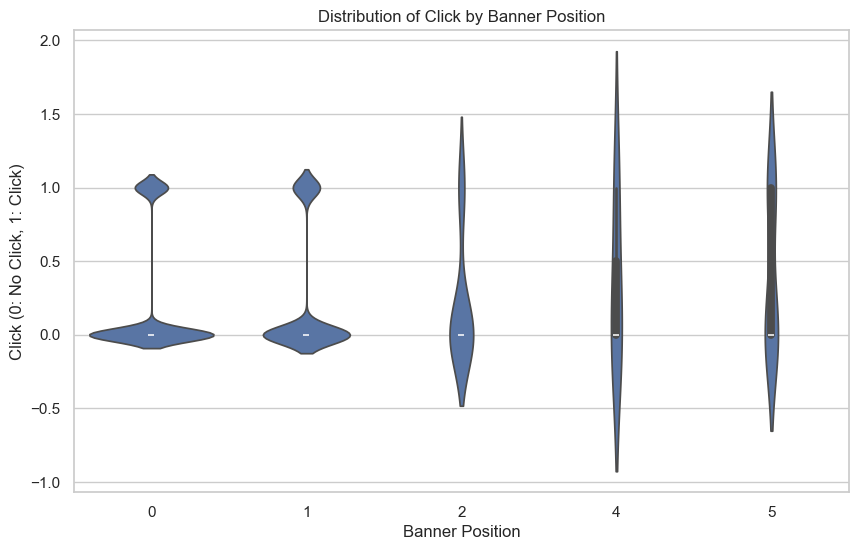

In [44]:
#Violin plot to visualie
# Violin plot to visualize the distribution of 'click' across different 'banner_pos' values
plt.figure(figsize=(10, 6))
sns.violinplot(data=ctr_df, x='banner_pos', y='click', hue=None)
plt.title('Distribution of Click by Banner Position')
plt.xlabel('Banner Position')
plt.ylabel('Click (0: No Click, 1: Click)')
plt.show()

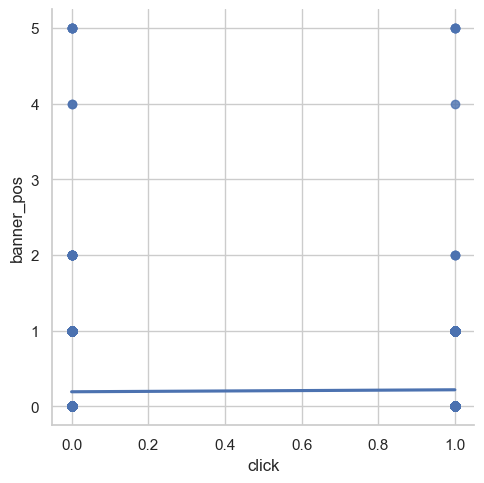

In [50]:
# Create implot
sns.lmplot(data=ctr_df, x="click", y="banner_pos")
plt.show()

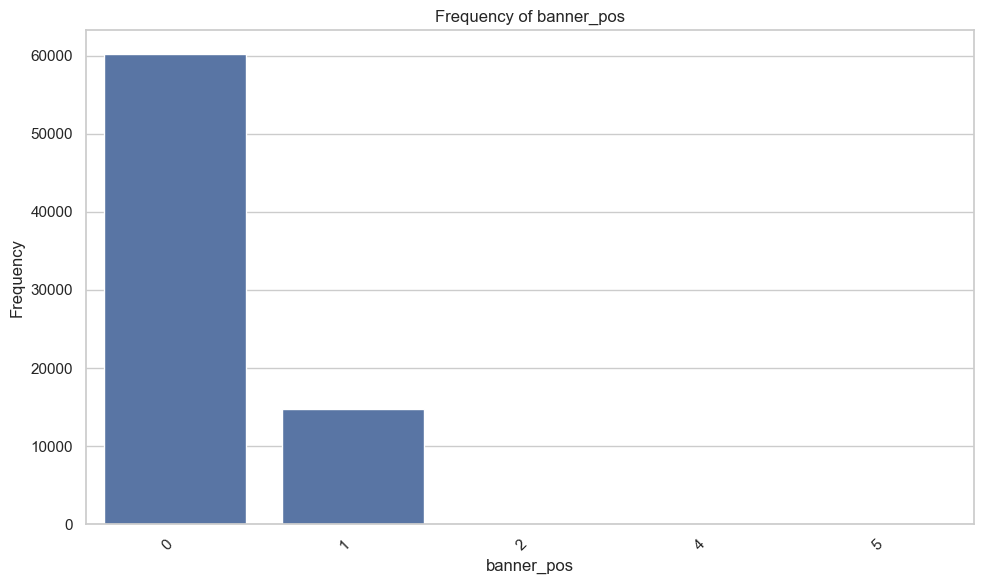

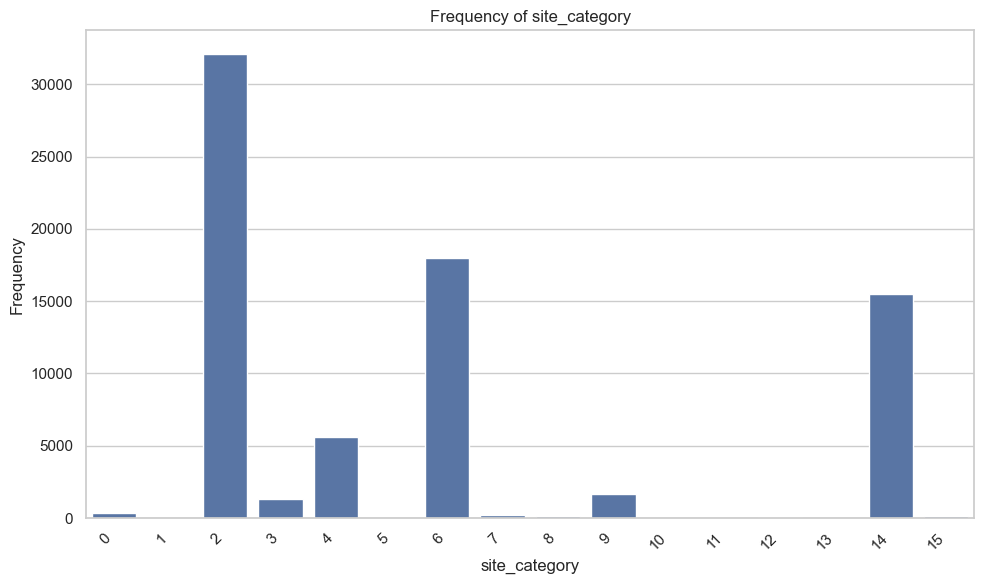

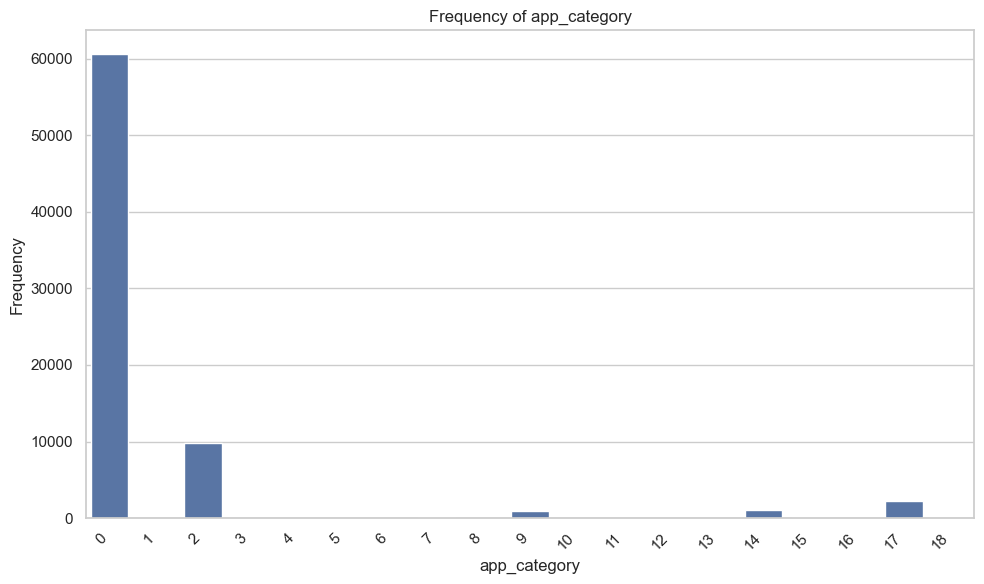

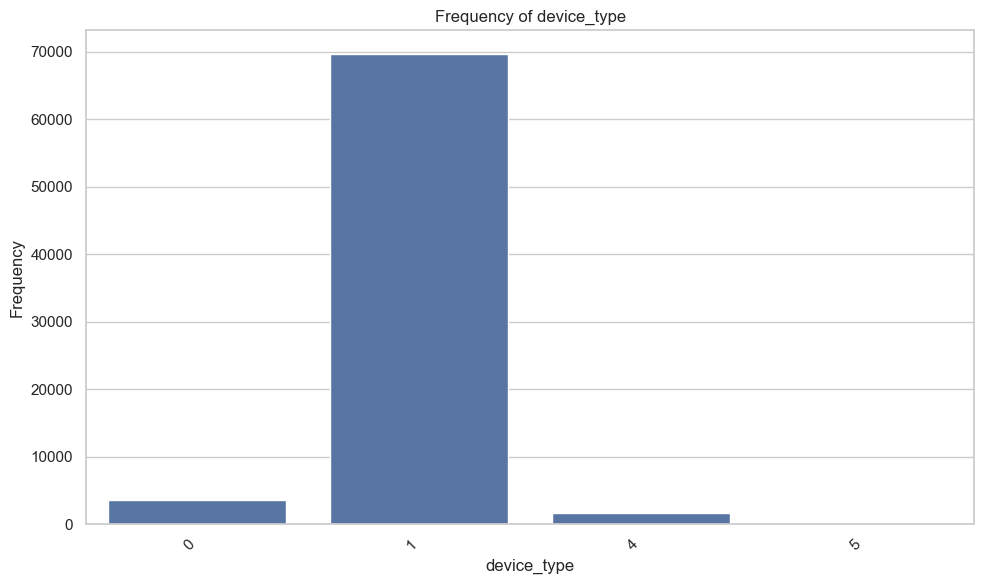

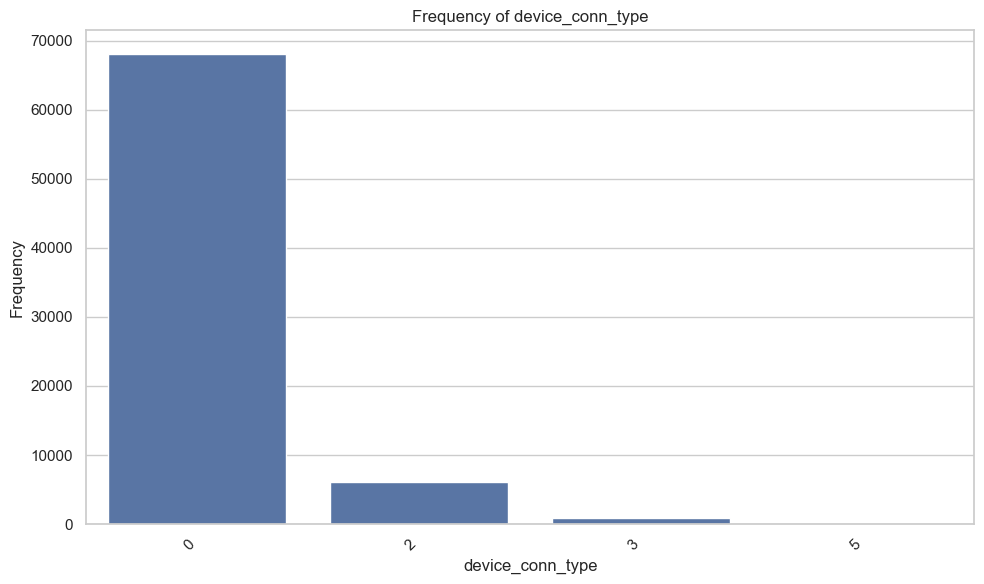

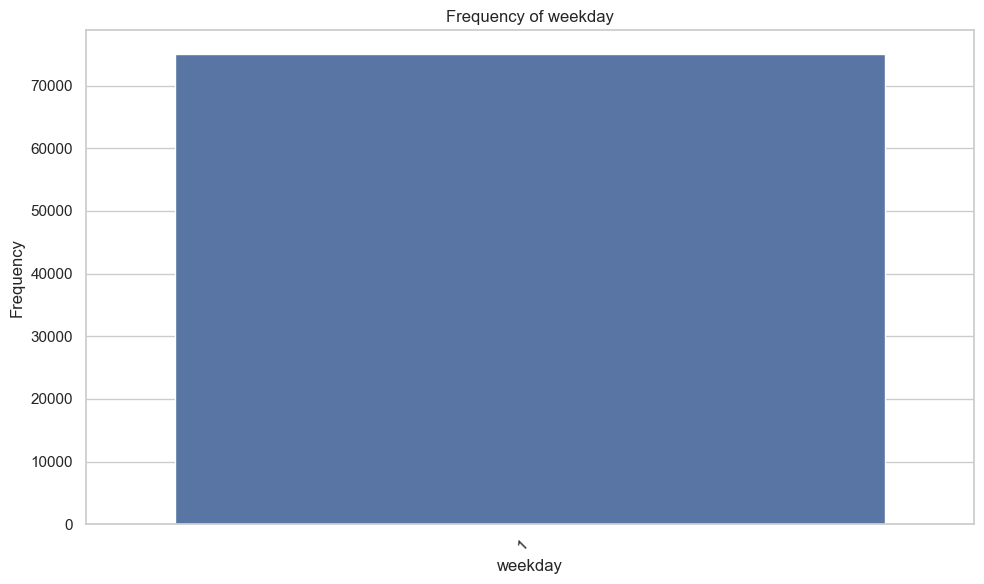

In [56]:
categorical_features = ['banner_pos', 'site_category', 'app_category',
                        'device_type', 'device_conn_type', 'weekday']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=ctr_df, x=feature)
    plt.title(f'Frequency of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()

In [62]:
#Domain-Specific Features (Based on your understanding of the data):

#High-performing site/app indicator: Create a binary feature indicating if a 'site_id' or 'app_id' has historically had a high CTR.
# --- For 'site_id' ---
# 1. Calculate the average CTR for each 'site_id' (considering only observed categories)
site_ctr = ctr_df.groupby('site_id', observed=True)['click'].mean()

# 2. Determine a threshold for "high CTR".
overall_ctr = ctr_df['click'].mean()
high_ctr_threshold_site = overall_ctr

# 3. Create the binary 'is_high_ctr_site' feature
ctr_df['is_high_ctr_site'] = ctr_df['site_id'].map(lambda site: 1 if site_ctr.get(site, 0) > high_ctr_threshold_site else 0)

print("First few rows with 'is_high_ctr_site' feature:")
print(ctr_df[['site_id', 'click', 'is_high_ctr_site']].head())

print("\nValue counts for 'is_high_ctr_site':")
print(ctr_df['is_high_ctr_site'].value_counts())

# --- For 'app_id' ---
# 1. Calculate the average CTR for each 'app_id' (considering only observed categories)
app_ctr = ctr_df.groupby('app_id', observed=True)['click'].mean()

# 2. Determine a threshold for "high CTR" for apps.
high_ctr_threshold_app = overall_ctr

# 3. Create the binary 'is_high_ctr_app' feature
ctr_df['is_high_ctr_app'] = ctr_df['app_id'].map(lambda app: 1 if app_ctr.get(app, 0) > high_ctr_threshold_app else 0)

print("\nFirst few rows with 'is_high_ctr_app' feature:")
print(ctr_df[['app_id', 'click', 'is_high_ctr_app']].head())

print("\nValue counts for 'is_high_ctr_app':")
print(ctr_df['is_high_ctr_app'].value_counts())

First few rows with 'is_high_ctr_site' feature:
  site_id  click  is_high_ctr_site
0     104      0                 1
1     104      0                 1
2     104      0                 1
3     104      0                 1
4     881      0                 0

Value counts for 'is_high_ctr_site':
is_high_ctr_site
1    43944
0    31114
Name: count, dtype: int64

First few rows with 'is_high_ctr_app' feature:
  app_id  click  is_high_ctr_app
0    656      0                1
1    656      0                1
2    656      0                1
3    656      0                1
4    656      0                1

Value counts for 'is_high_ctr_app':
is_high_ctr_app
1    62706
0    12352
Name: count, dtype: int64


Correlation of 'click' with 'click': The cell at the intersection of 'click' and 'click' has a value of 1. This is expected because a variable is perfectly correlated with itself.
Correlation of 'device_ip' with 'device_ip': Similarly, the cell at the intersection of 'device_ip' and 'device_ip' has a value of 1, indicating perfect self-correlation.
Correlation between 'click' and 'device_ip': The cells at the intersection of 'click' and 'device_ip' (and vice versa) show a correlation coefficient of -0.0011.

Meaning of the Correlation Value:
Strength: The value of -0.0011 is very close to zero. This indicates a very weak or practically negligible linear relationship between the 'click' variable and the 'device_ip' variable.

Direction: The negative sign suggests a very slightly inverse relationship. This would mean that as the 'device_ip' (represented numerically) increases, the likelihood of a click very, very slightly decreases, or vice versa. However, given the extremely small magnitude, this relationship is not meaningful in a practical sense.

In conclusion, this heatmap indicates that there is no significant linear correlation between the 'click' variable and the numerical representation of the 'device_ip' variable in your dataset.


X-axis: Represents different categories within the 'C1' feature (e.g., 1001, 1002, 1005, 1007, 1008, 1010). 'C1' is a categorical feature in the dataset.
Y-axis: Represents the Click-Through Rate (CTR), ranging from 0.00 to 0.40 (or 0% to 40%). CTR is calculated as the number of clicks divided by the number of impressions for each category.

Interpretation: This chart shows how the CTR varies across different values of the 'C1' feature. 
For example: Category '1008' in 'C1' has a relatively high CTR (around 0.38 or 38%).

Category '1001' has a lower CTR (around 0.12 or 12%).
The CTR varies significantly across different 'C1' categories, suggesting that 'C1' might be a useful feature for predicting clicks.

In summary, these charts provide valuable insights into how different categorical features influence the click-through rate, which is a fundamental aspect of exploratory data analysis for a CTR prediction task.

EDA Explanation for the CTR Project:

Based on the content of CTR EDA notebook for the Click-Through Rate (CTR) Prediction Project, here's a concise summary, explanation, and conclusion:

Summary of EDA (Exploratory Data Analysis):
Dataset Overview:
The dataset contains 75,058 rows and 25 columns.
Most columns are categorical (23 out of 25), with click as the target variable (binary: 0 or 1).

Missing Values: No missing values found in any columns.
Target Variable Analysis (click): Significant class imbalance:
Majority of records are labeled 0 (no click). Minority are labeled 1 (click).

Data Types & Memory Optimization:
Categorical features were converted from object to category types.
This reduced memory usage drastically (down to ~3.9 MB), making processing more efficient.

Categorical Features:
Distributions of the top categories for each categorical column were visualized using count plots.
Some features like site_id, app_id, and device_ip show highly skewed distributions, implying that a few categories dominate.

Site & App Patterns:
Popular sites and apps may drive more impressions, while rare ones may be grouped or one-hot encoded carefully to avoid sparsity.

Explanation:
This EDA reveals several insights:

The CTR problem is imbalanced, which is common in ad-tech. Most users don’t click ads.

- Understanding frequency and distribution of categorical features helps in feature engineering.
- Transforming object columns to category saves memory and improves speed.
- This data is clean and handles imbalance during modeling.
- Engineer better features based on frequency patterns.

Conclusion:
- The dataset is clean and optimized for modeling.
- However, the class imbalance in the target variable is a major consideration for predictive modeling.


Dataset is highly imbalanced (class imbalance needs handling).

No strong linear correlation among features; non-linear models are likely better suited.

Features show skewness and possible outliers; preprocessing may improve model robustness.

Visual patterns suggest some weak relationships between features and target — good candidates for machine learning modeling.